In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset_path = 'Rotman 2025 Datathon Dataset/Datathon_data-2025-Raw.xlsx'
df = pd.read_excel(dataset_path)
cleaned_dataset_path = "Cleaned_CoL_data.csv"
cleaned_df = pd.read_csv(cleaned_dataset_path)


# Count the number of rows per country
country_row_counts = cleaned_df['Country Name'].value_counts()


# Filter out countries with fewer than 5 rows
countries_to_keep = country_row_counts[country_row_counts >= 5].index

# Filter the DataFrame to only include rows from countries with counts >= 5
cleaned_df = cleaned_df[cleaned_df['Country Name'].isin(countries_to_keep)]

# Save the updated DataFrame if needed
#cleaned_df = "Filtered_CoL_data.csv"
cleaned_df.to_csv(cleaned_dataset_path, index=False)

print(f"Filtered dataset saved to {cleaned_dataset_path}")



Filtered dataset saved to Cleaned_CoL_data.csv


In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the cleaned dataset
cleaned_dataset_path = "Cleaned_CoL_data.csv"
cleaned_df = pd.read_csv(cleaned_dataset_path)

# Function to apply clustering to each country's data
def apply_clustering(country_data):
    # Select numeric columns
    numeric_columns = country_data.select_dtypes(include=[np.number]).columns.tolist()
    if not numeric_columns:
        return None  # Skip if no numeric data available

    # Drop rows with missing values
    data_for_clustering = country_data[numeric_columns].dropna()

    # Skip if there are no rows left after dropping NaNs
    if data_for_clustering.empty:
        return None

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_for_clustering)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)

    # Map clusters to labels (Rising, Normal, Decreasing) based on centroid ordering
    cluster_centroids = kmeans.cluster_centers_.mean(axis=1)
    cluster_labels = {cluster: label for cluster, label in zip(np.argsort(cluster_centroids), ["Decreasing", "Normal", "Rising"])}

    # Assign cluster classifications
    data_for_clustering["Cluster"] = clusters
    data_for_clustering["CoL Classification"] = data_for_clustering["Cluster"].map(cluster_labels)

    # Merge classifications back into the original country data
    country_data = country_data.merge(
        data_for_clustering[["Cluster", "CoL Classification"]],
        how="left",
        left_index=True,
        right_index=True
    )

    return country_data

# Apply clustering for each country
clustered_results = []
for country, group in cleaned_df.groupby("Country Name"):
    clustered_country_data = apply_clustering(group)
    if clustered_country_data is not None:
        clustered_results.append(clustered_country_data)

# Combine all clustered data into one DataFrame
final_clustered_df = pd.concat(clustered_results, ignore_index=True)

# Save the results to a new CSV
output_file = "Clustered_CoL_data.csv"
final_clustered_df.to_csv(output_file, index=False)

print(f"Clustering results saved to {output_file}")


Clustering results saved to Clustered_CoL_data.csv


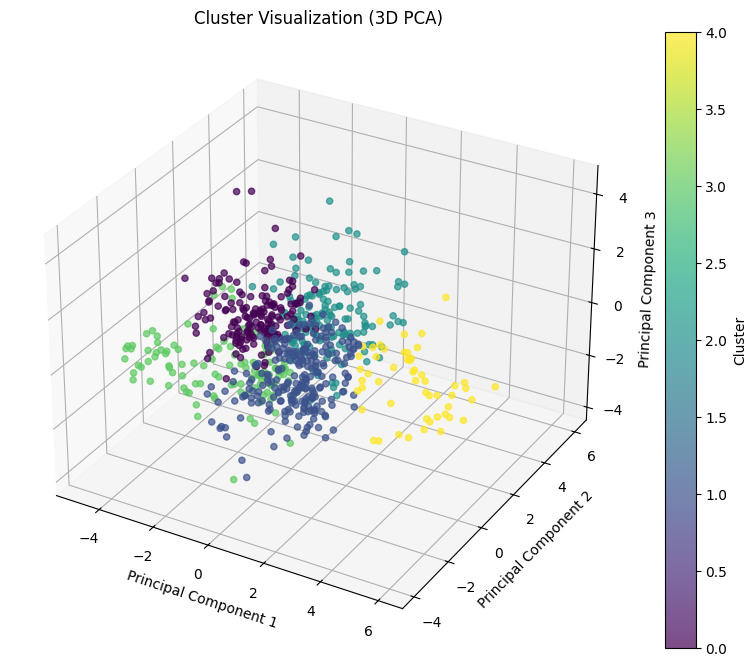

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import zscore

def visualize_clusters_3d(file_path):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Select numeric columns except "Country Name" and "Time"
    numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
    numeric_columns = [col for col in numeric_columns if col not in ["Time"]]

    # Normalize data within each country (if applicable)
    if "Country Name" in data.columns:
        data[numeric_columns] = data.groupby("Country Name")[numeric_columns].transform(
            lambda x: (x - x.mean()) / x.std()
        )

    # Drop rows with missing values
    data_for_clustering = data[numeric_columns].dropna()

    # Remove outliers
    z_scores = np.abs(zscore(data_for_clustering))
    data_for_clustering = data_for_clustering[(z_scores < 3).all(axis=1)]

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_for_clustering)

    # Apply PCA for 3D visualization
    pca = PCA(n_components=3)
    reduced_data = pca.fit_transform(scaled_data)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)

    # Plot the PCA results with cluster labels in 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(
        reduced_data[:, 0], 
        reduced_data[:, 1], 
        reduced_data[:, 2], 
        c=clusters, 
        cmap='viridis', 
        alpha=0.7
    )
    ax.set_title("Cluster Visualization (3D PCA)")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    ax.set_zlabel("Principal Component 3")
    fig.colorbar(scatter, label="Cluster")

    # Save the plot as a backup
    fig.savefig("3D_cluster_plot.png")

    # Ensure the plot is displayed
    plt.show()

# Test the function with your dataset
file_path = "Classified_Results.csv"
visualize_clusters_3d(file_path)


Visualizing clusters for: Albania


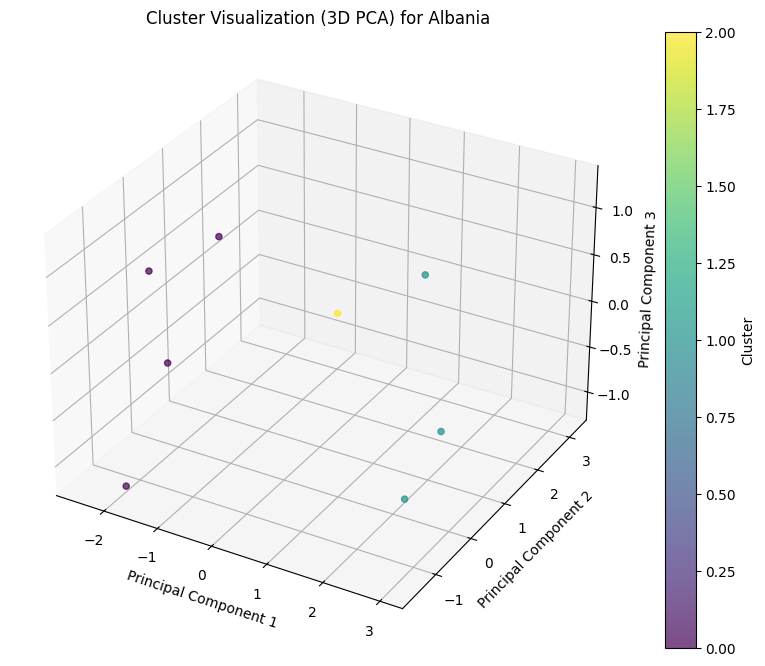

Visualizing clusters for: Armenia


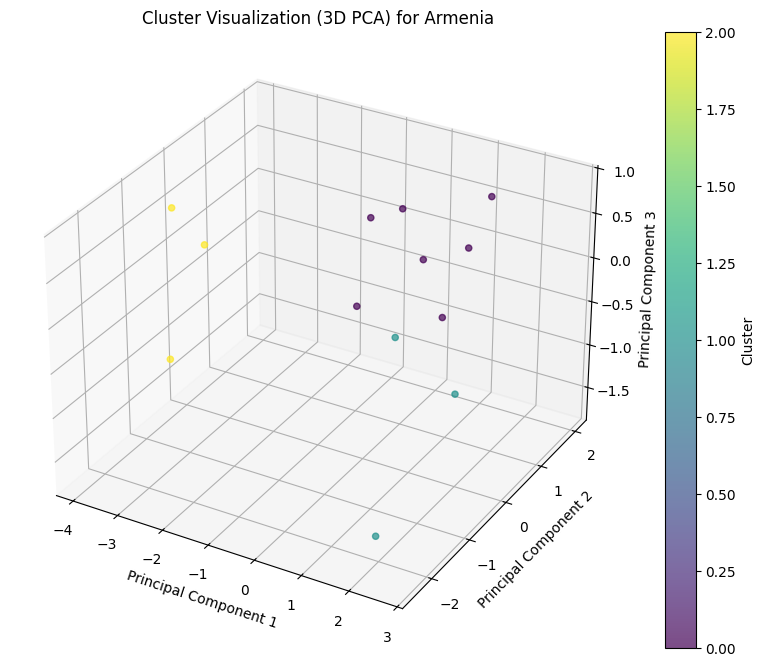

Visualizing clusters for: Austria


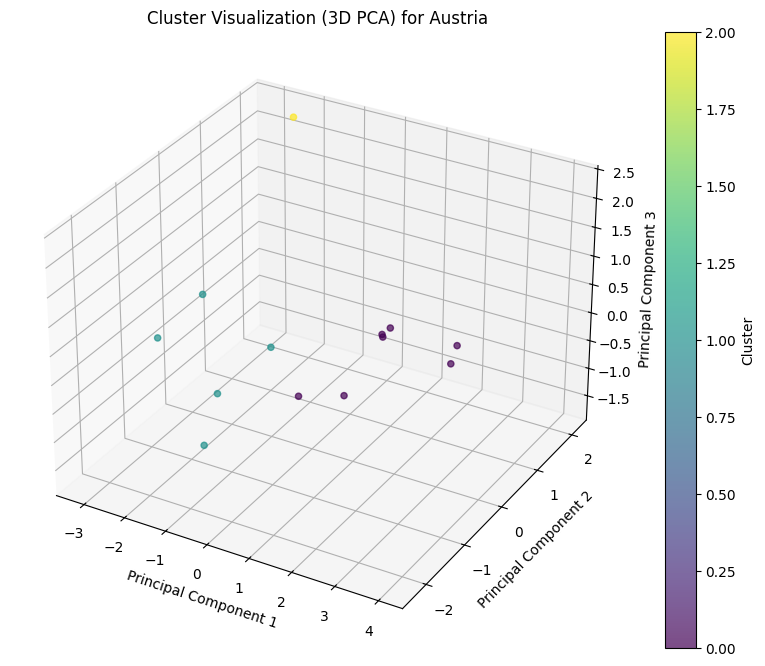

Visualizing clusters for: Belarus


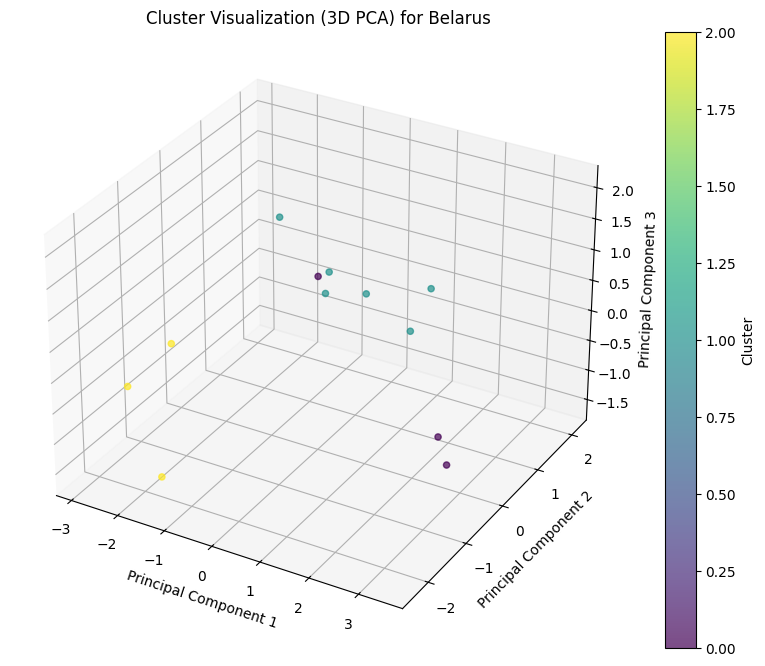

Visualizing clusters for: Belgium


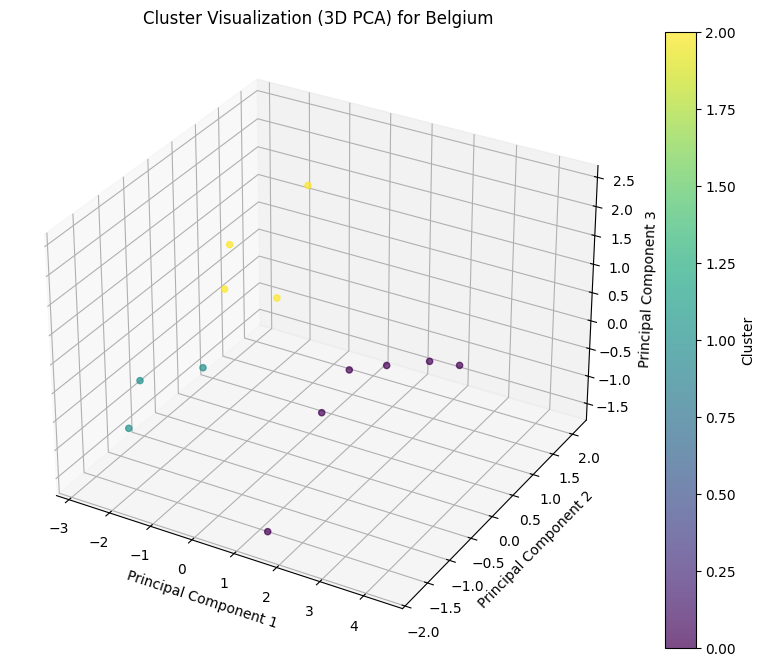

Visualizing clusters for: Bolivia


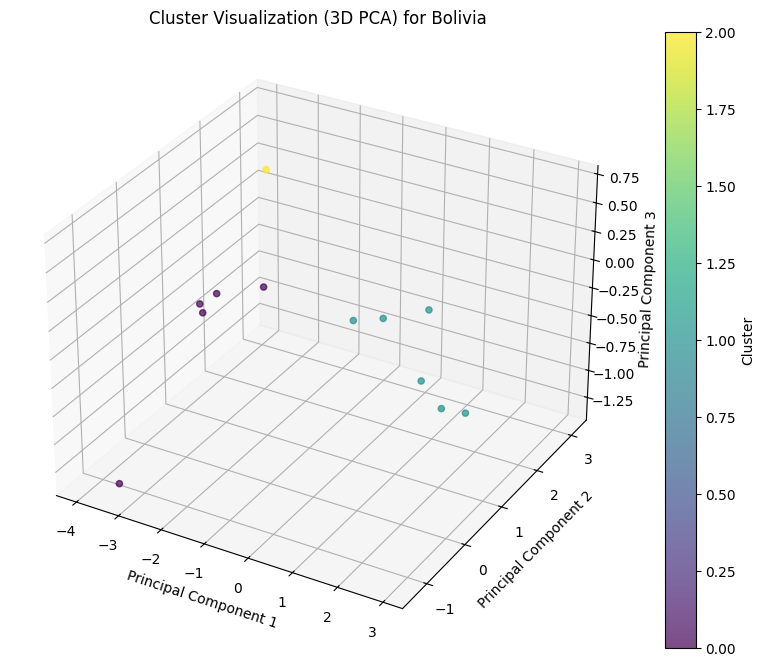

Visualizing clusters for: Brazil


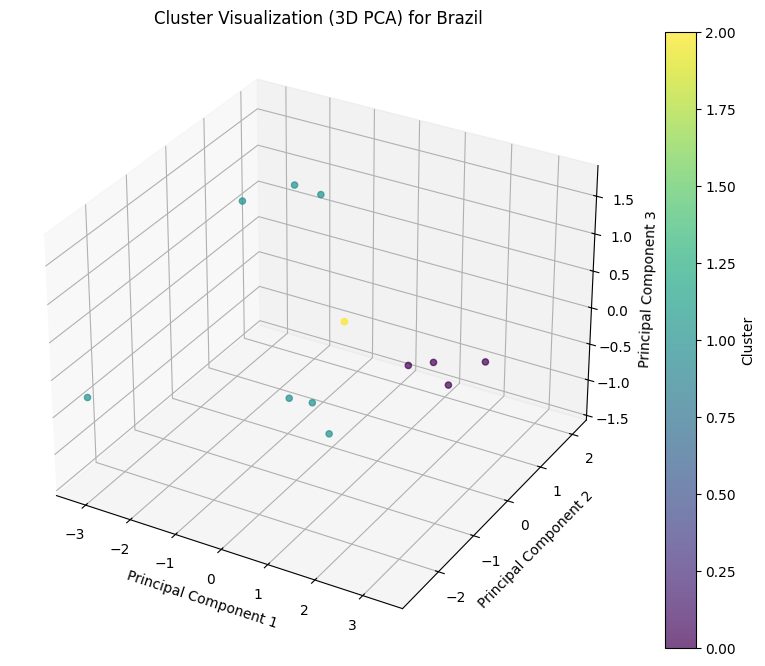

Visualizing clusters for: Bulgaria


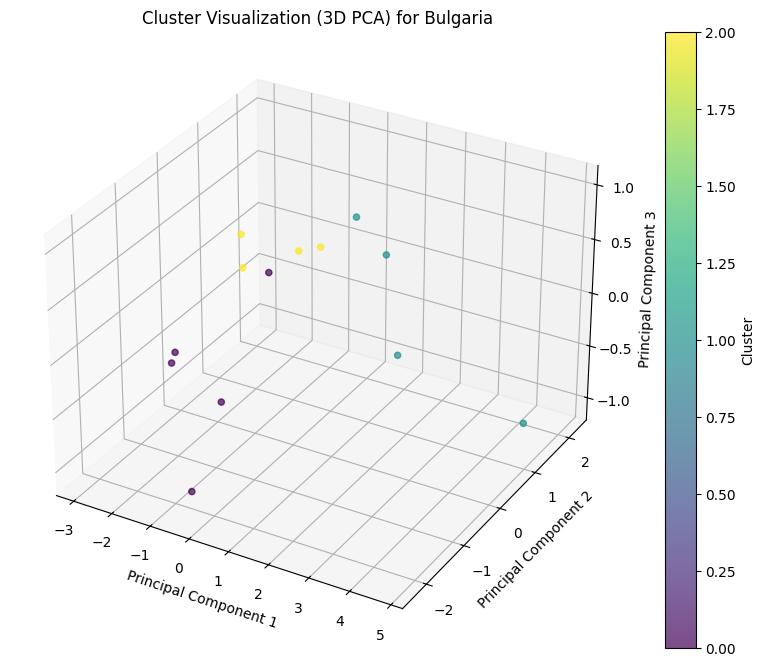

Visualizing clusters for: Canada


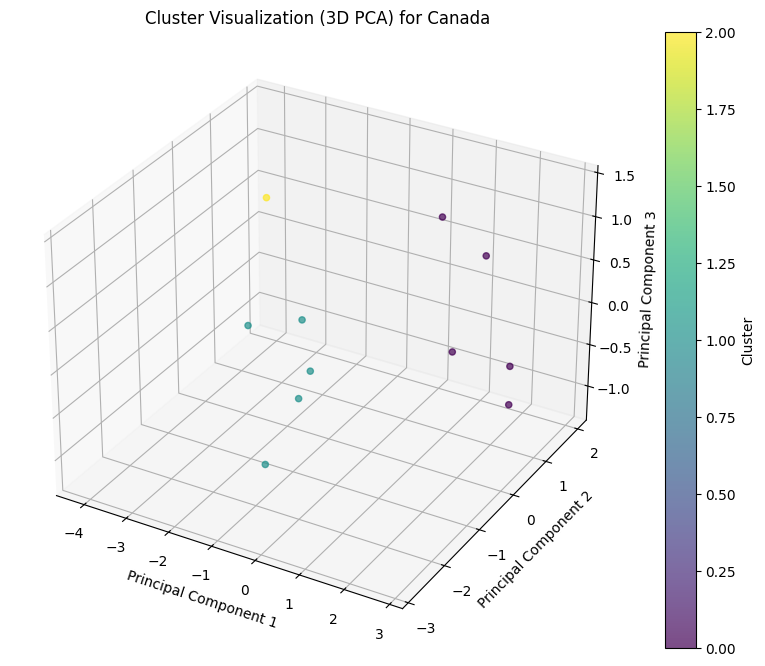

Visualizing clusters for: Chile


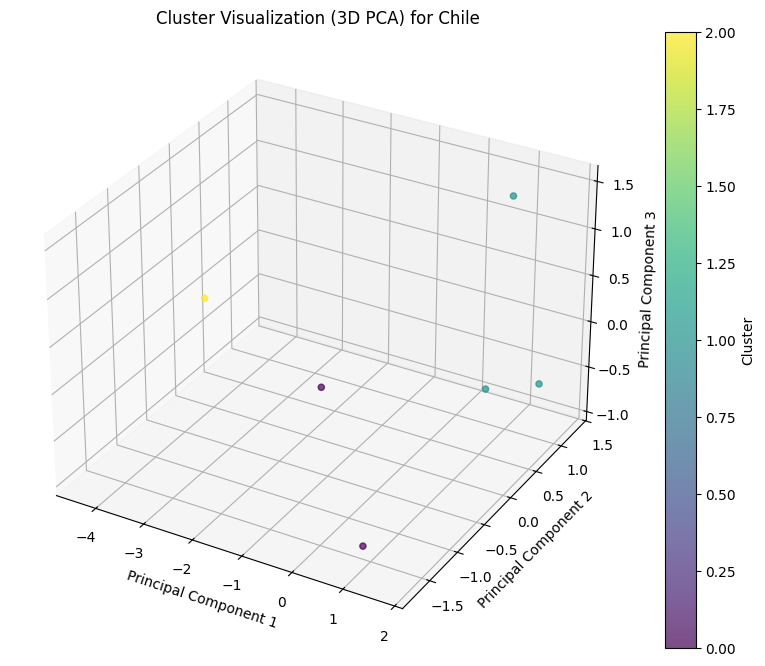

Visualizing clusters for: China


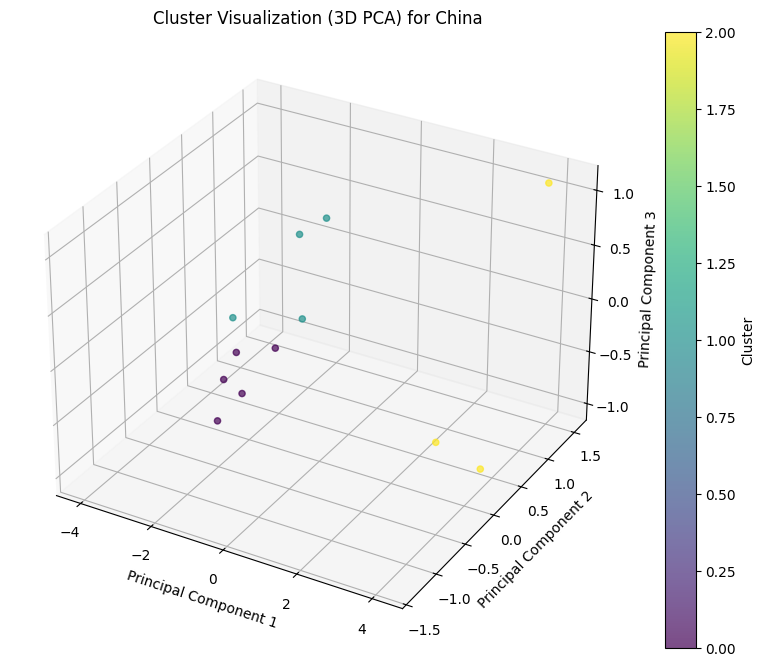

Visualizing clusters for: Colombia


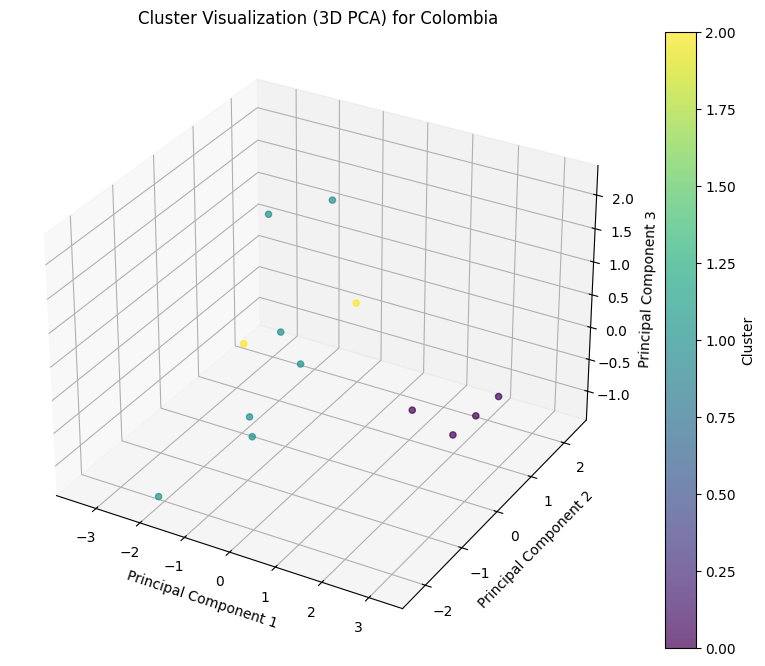

Visualizing clusters for: Costa Rica


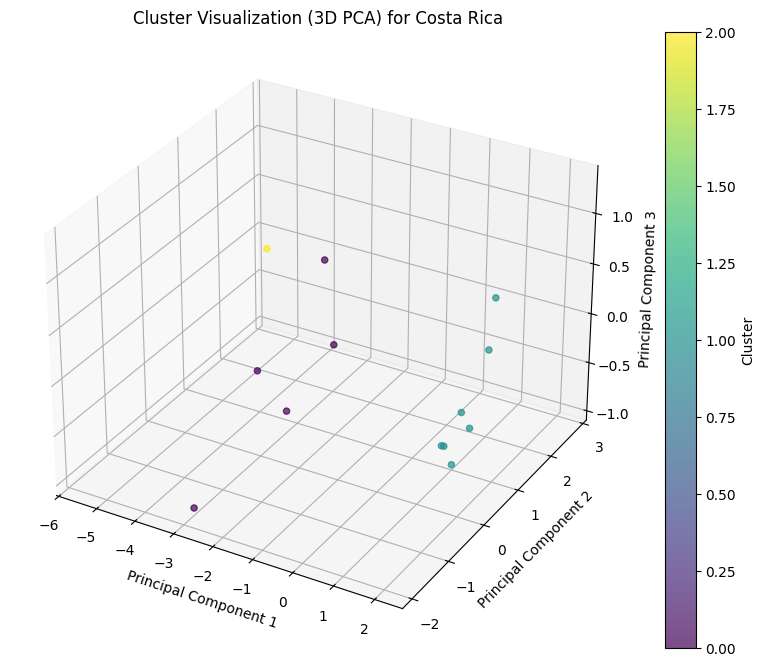

Visualizing clusters for: Croatia


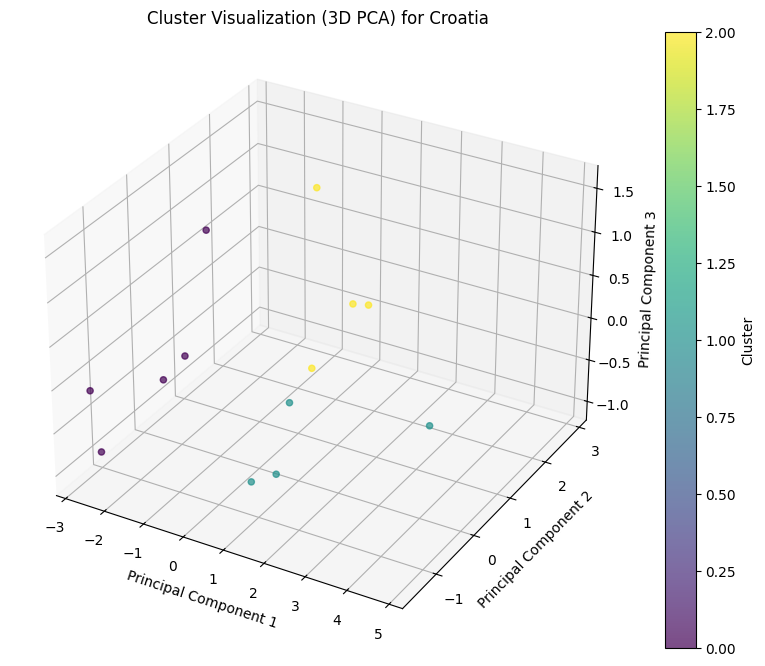

Visualizing clusters for: Cyprus


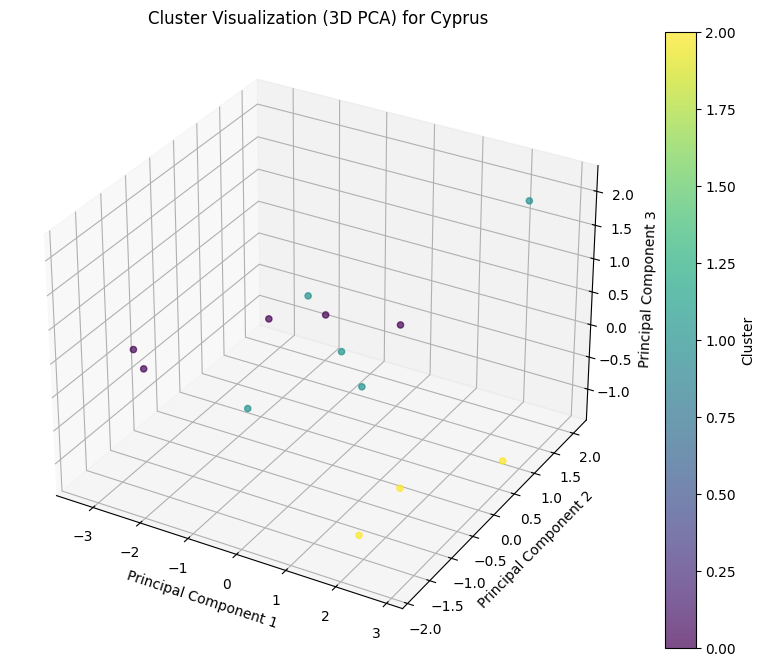

Visualizing clusters for: Czechia


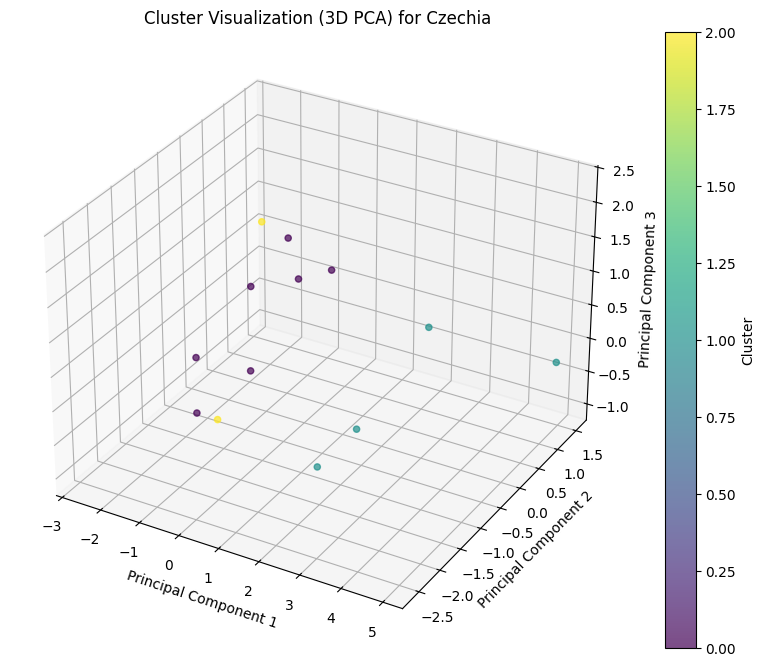

Visualizing clusters for: Denmark


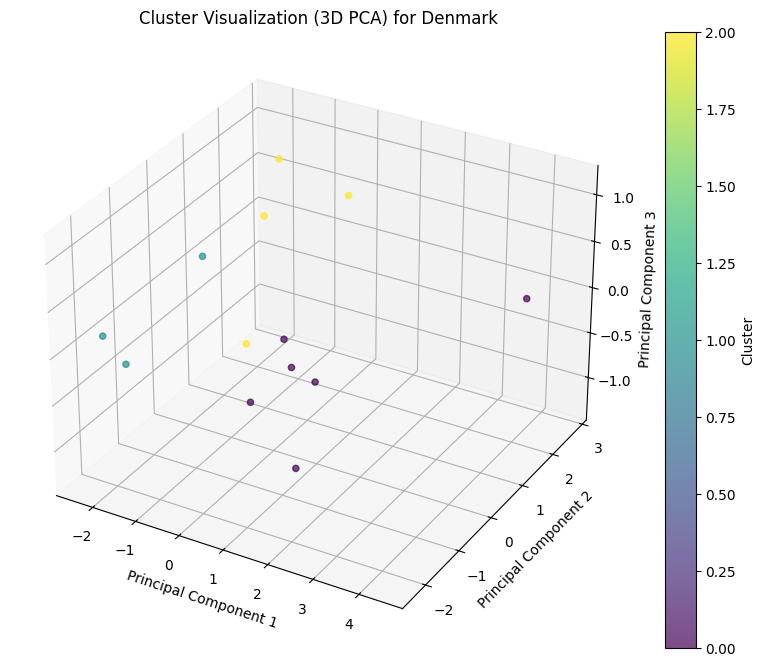

Visualizing clusters for: Dominican Republic


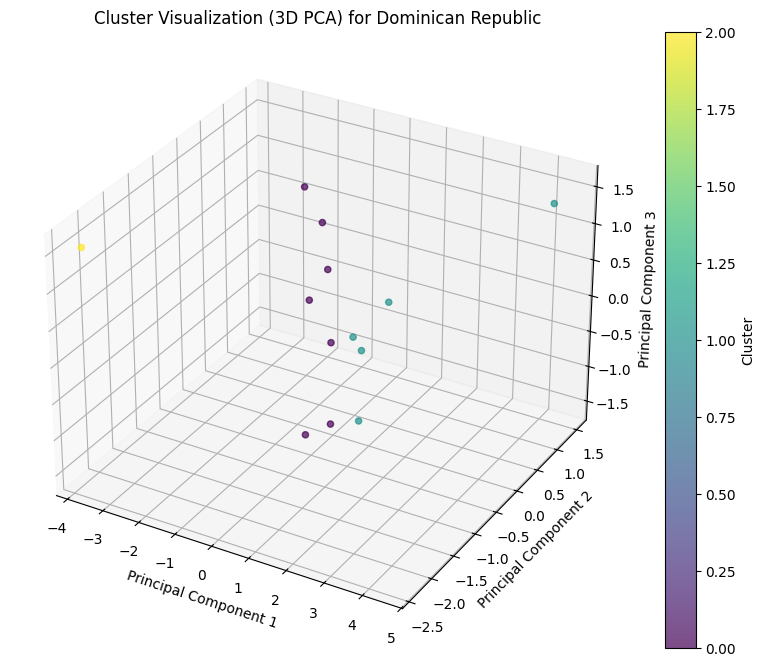

Visualizing clusters for: Ecuador


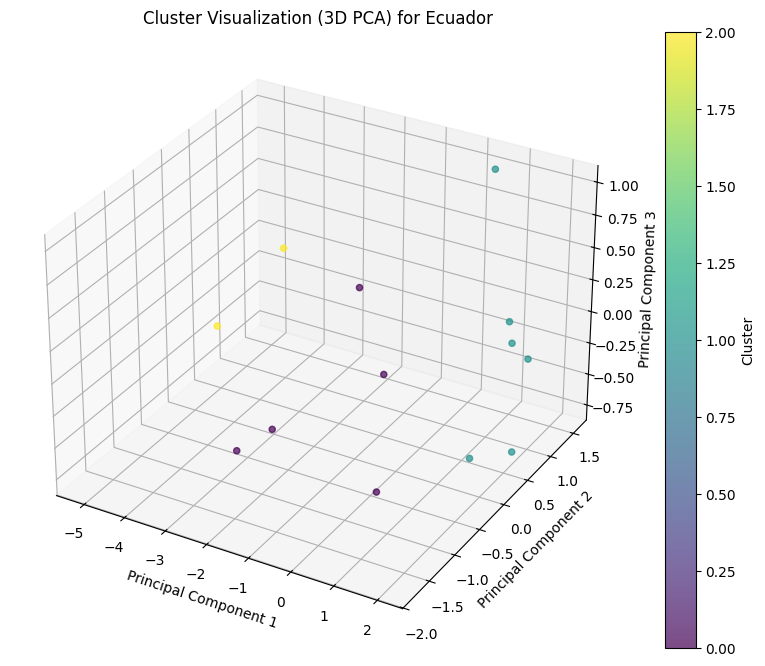

Visualizing clusters for: Egypt, Arab Rep.


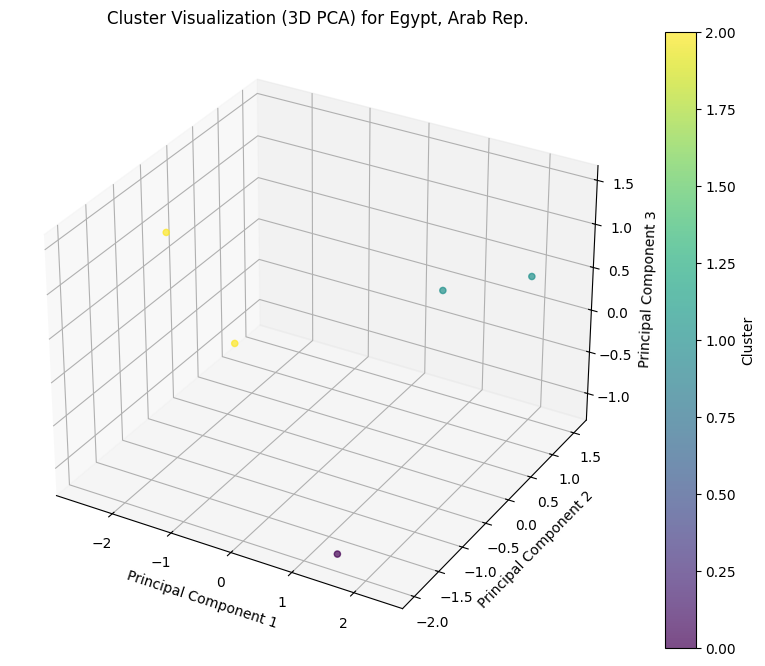

Visualizing clusters for: El Salvador


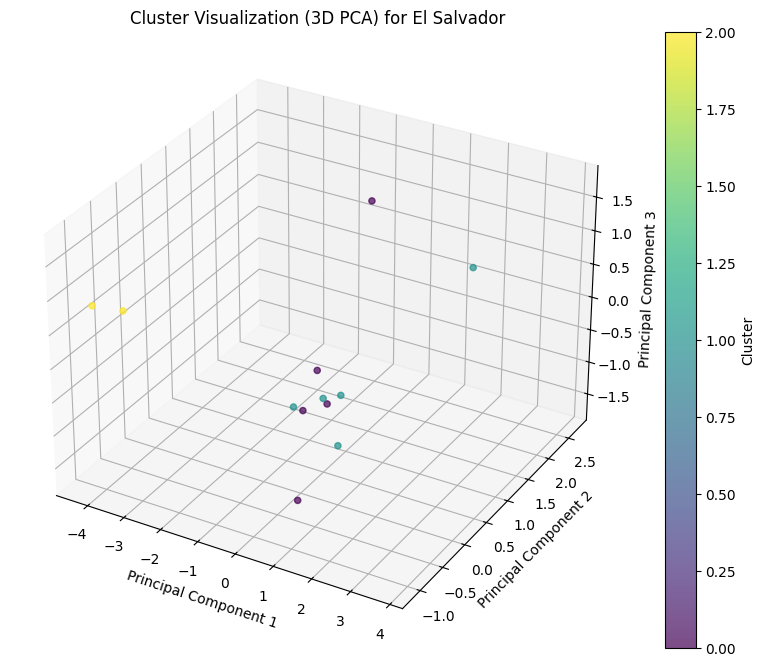

Visualizing clusters for: Estonia


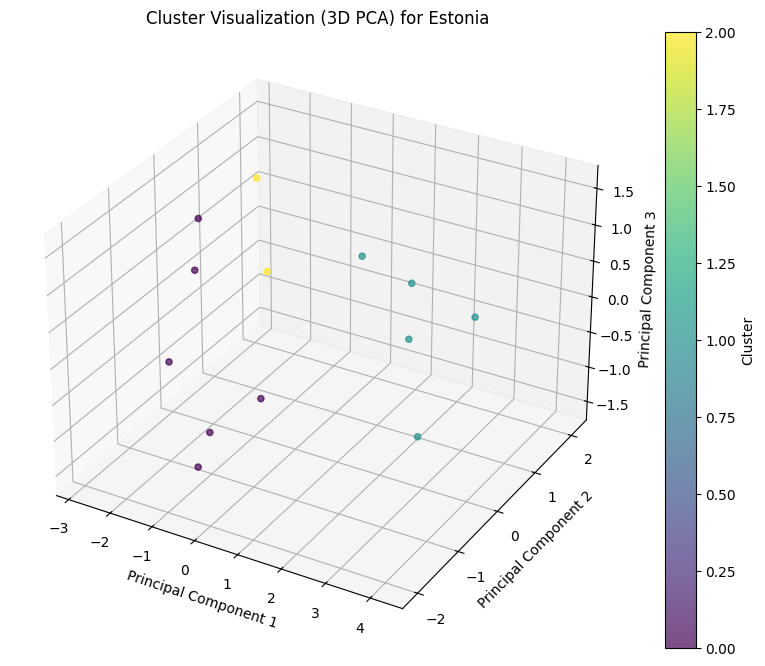

Visualizing clusters for: Finland


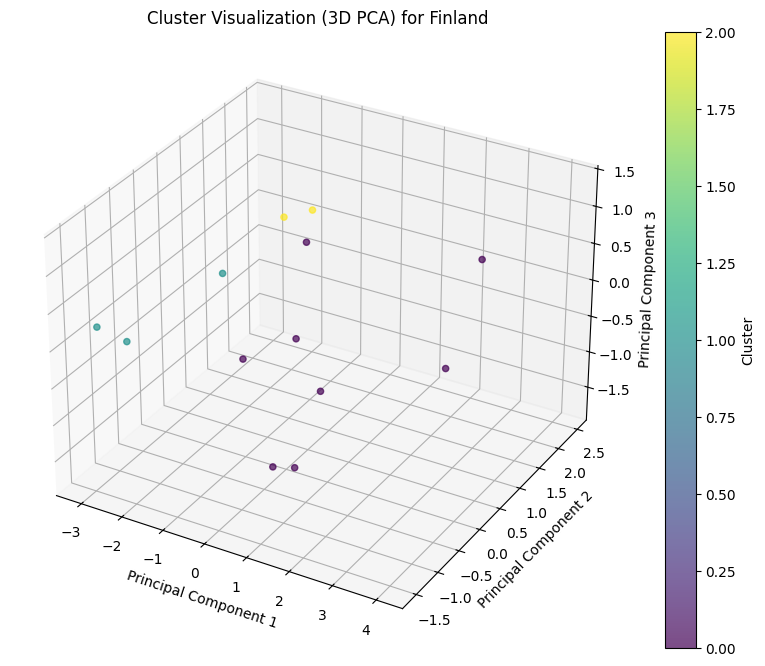

Visualizing clusters for: France


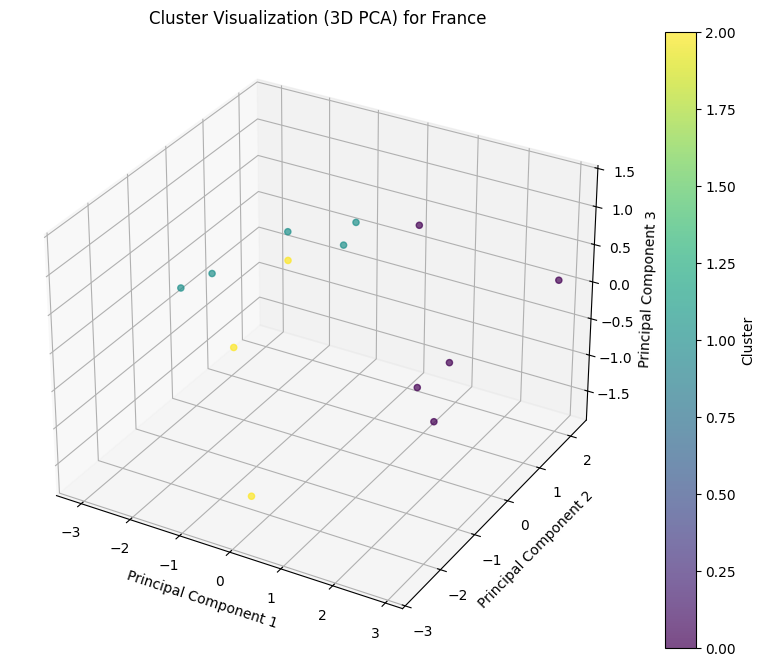

Visualizing clusters for: Georgia


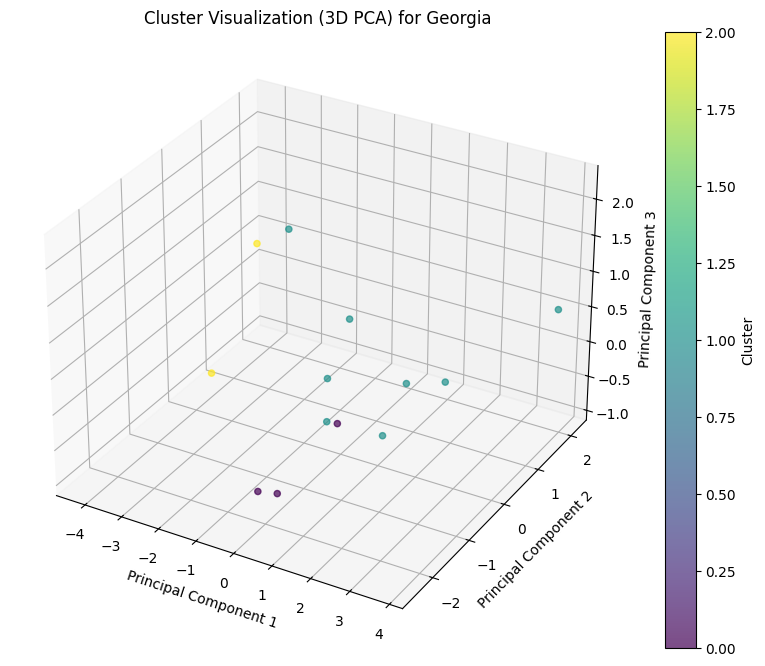

Visualizing clusters for: Germany


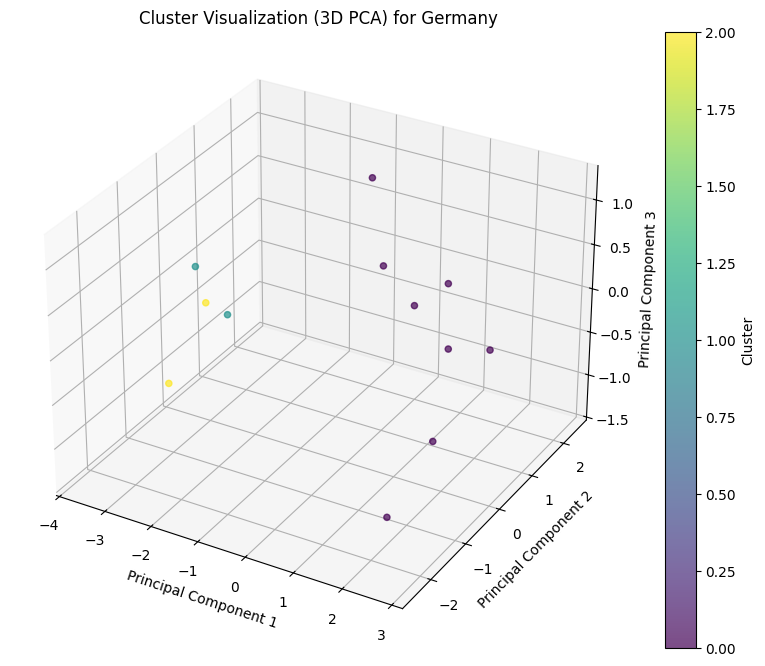

Visualizing clusters for: Greece


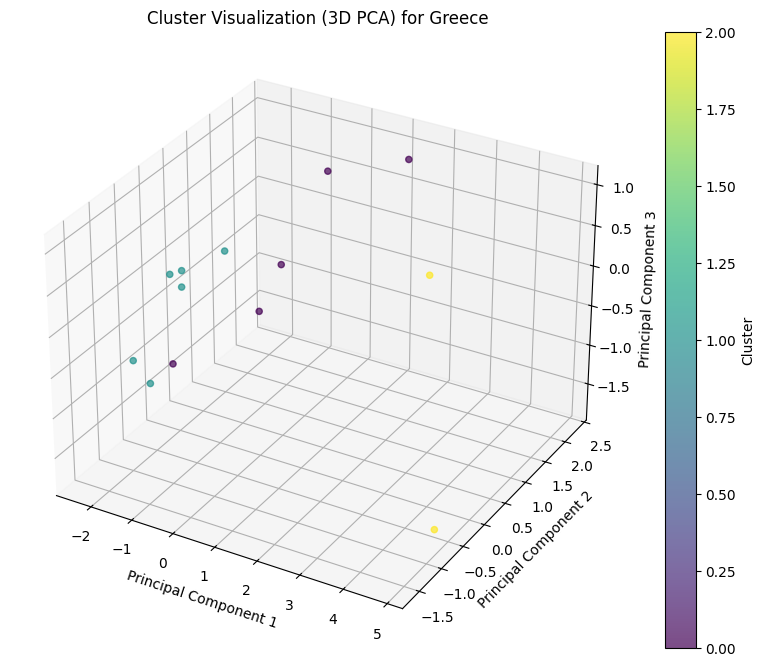

Visualizing clusters for: Honduras


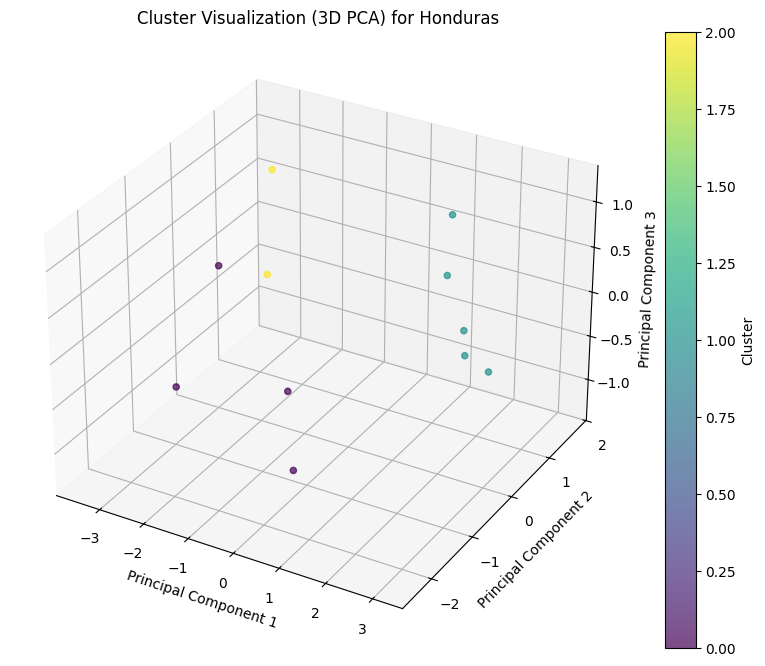

Visualizing clusters for: Hungary


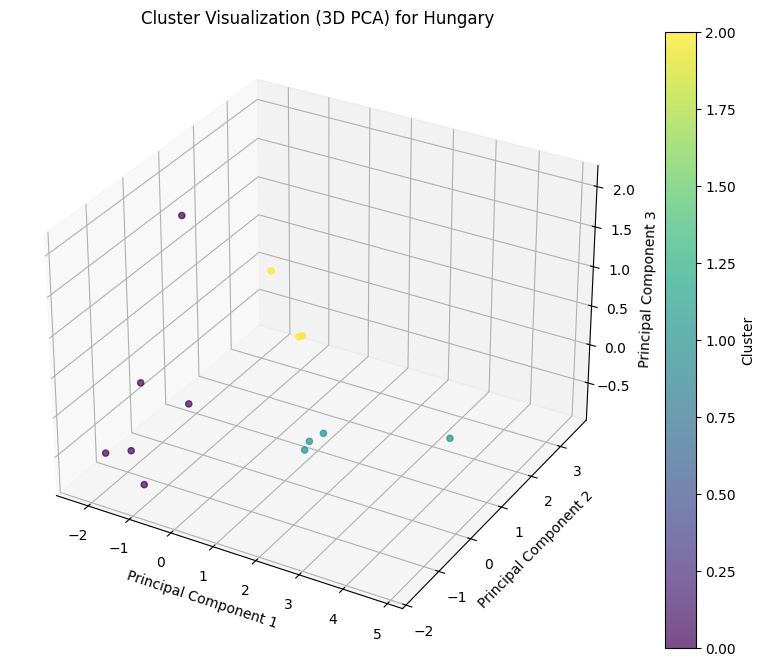

Visualizing clusters for: Iceland


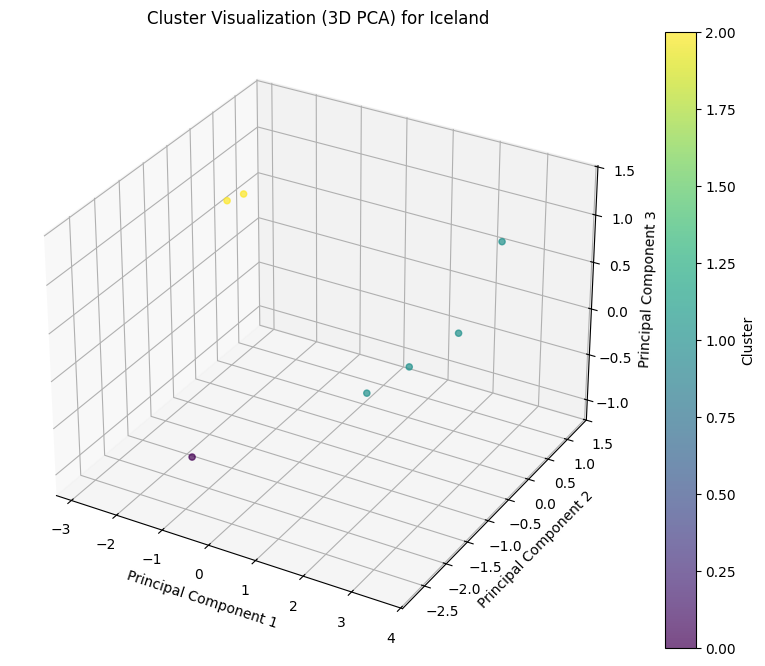

Visualizing clusters for: India


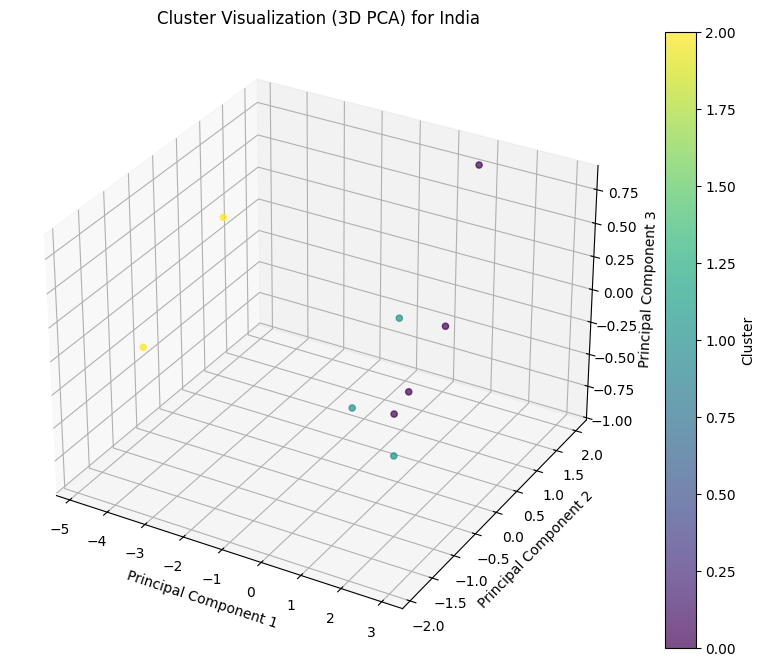

Visualizing clusters for: Indonesia


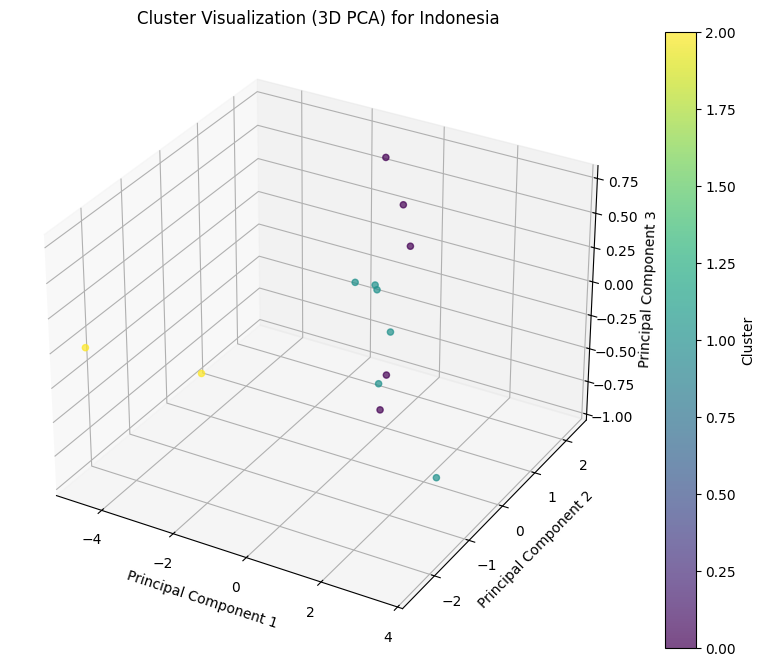

Visualizing clusters for: Iran, Islamic Rep.


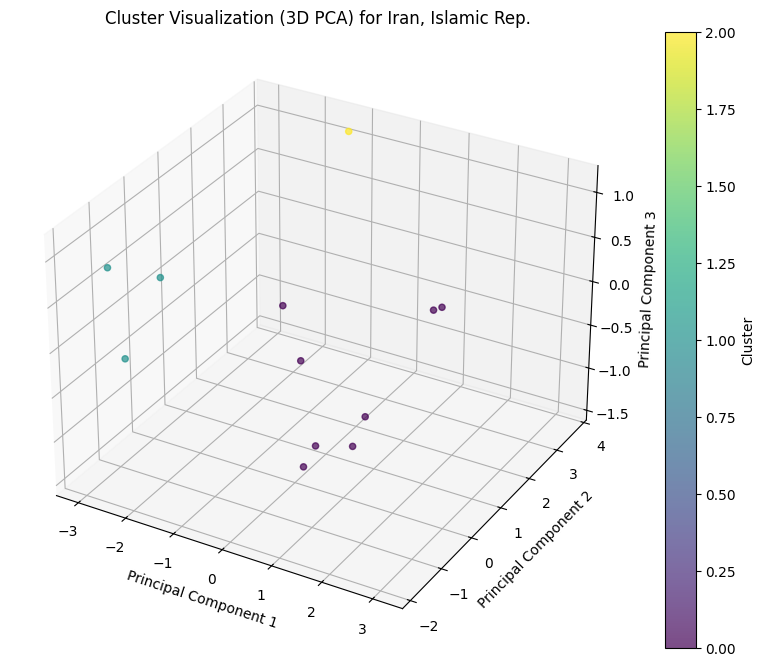

Visualizing clusters for: Ireland


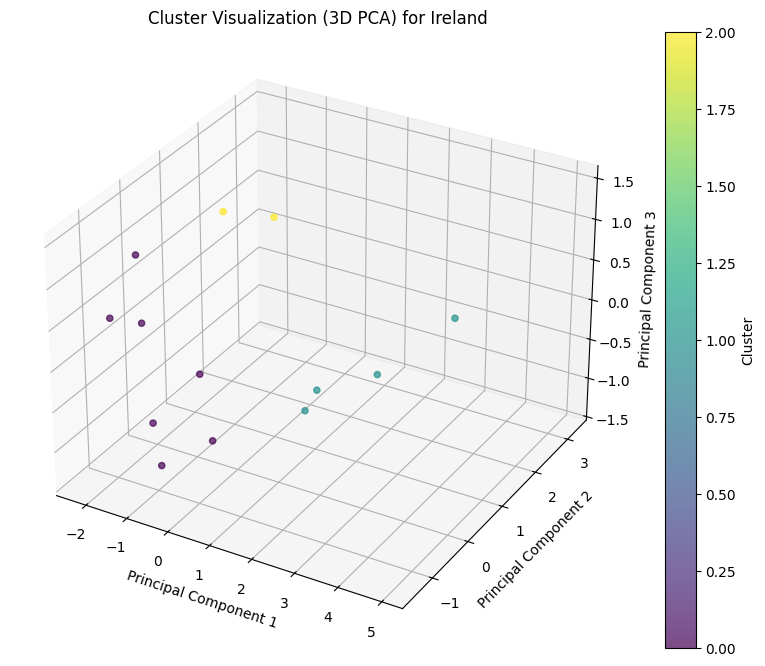

Visualizing clusters for: Israel


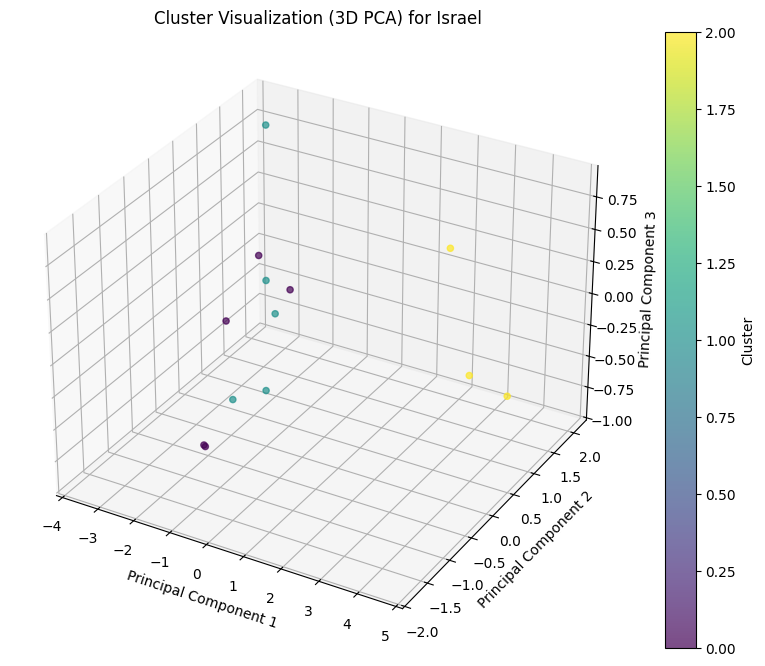

Visualizing clusters for: Italy


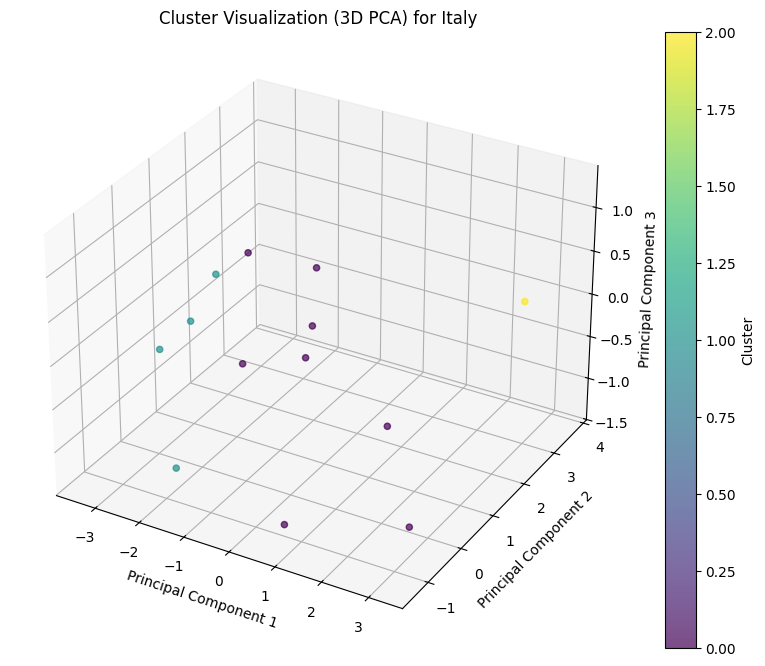

Visualizing clusters for: Kazakhstan


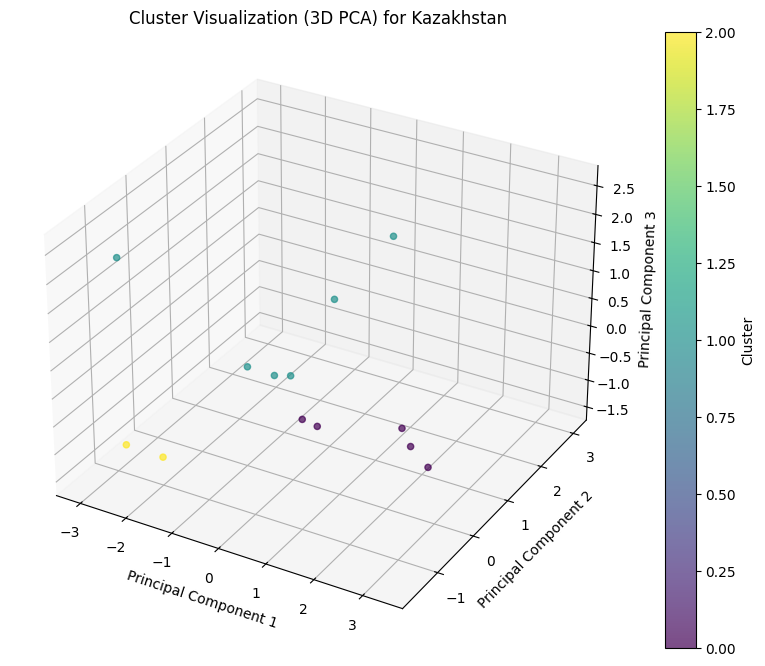

Visualizing clusters for: Korea, Rep.


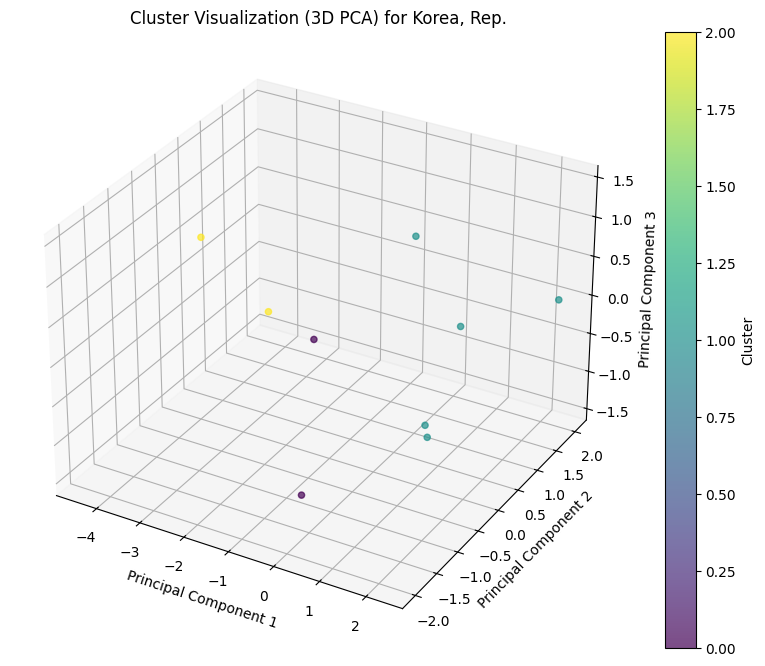

Visualizing clusters for: Kyrgyz Republic


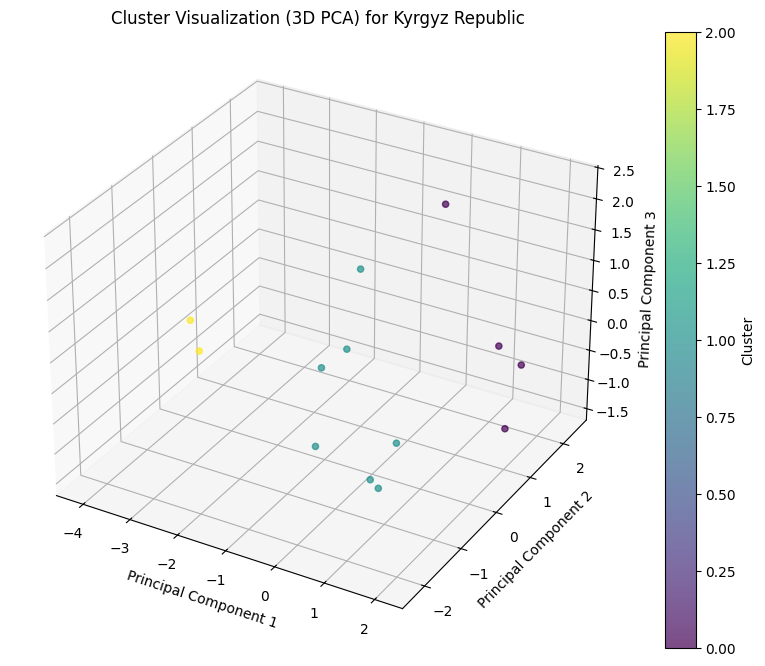

Visualizing clusters for: Latvia


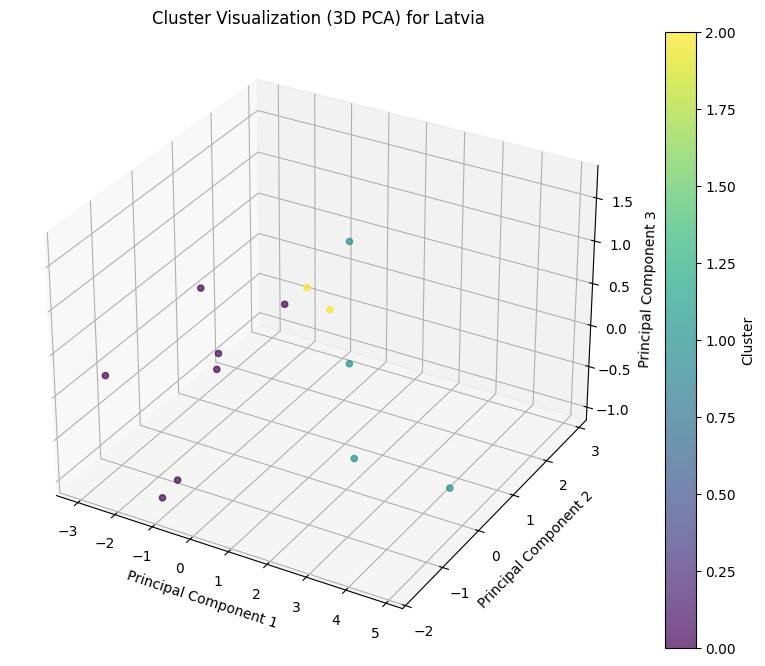

Visualizing clusters for: Lithuania


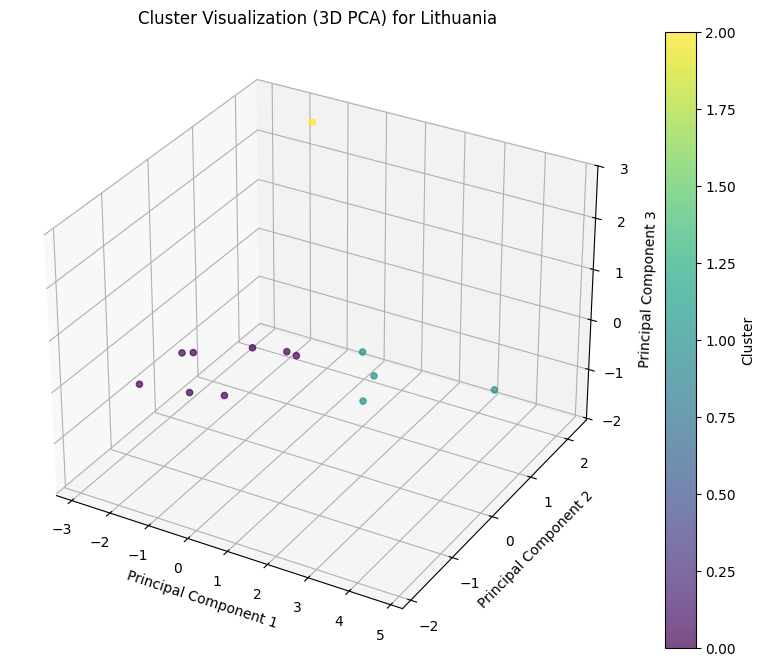

Visualizing clusters for: Luxembourg


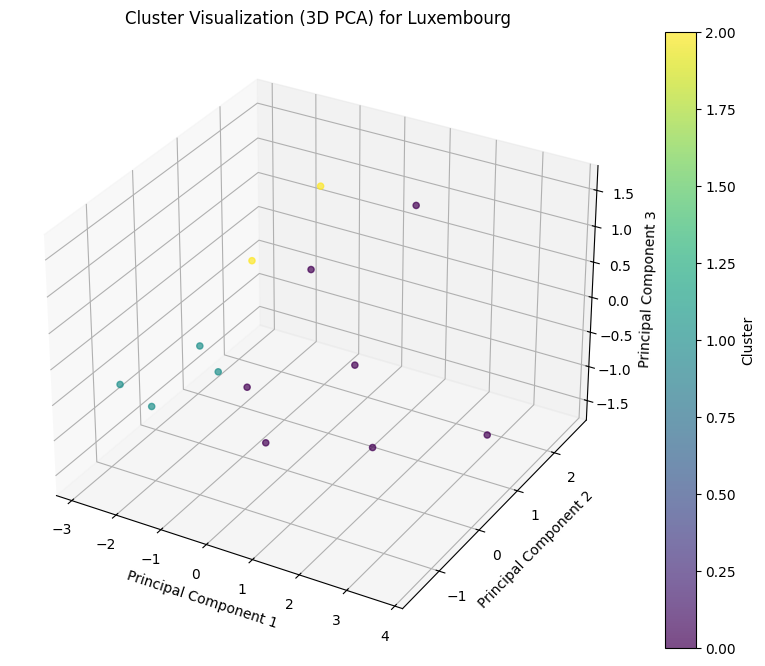

Visualizing clusters for: Malaysia


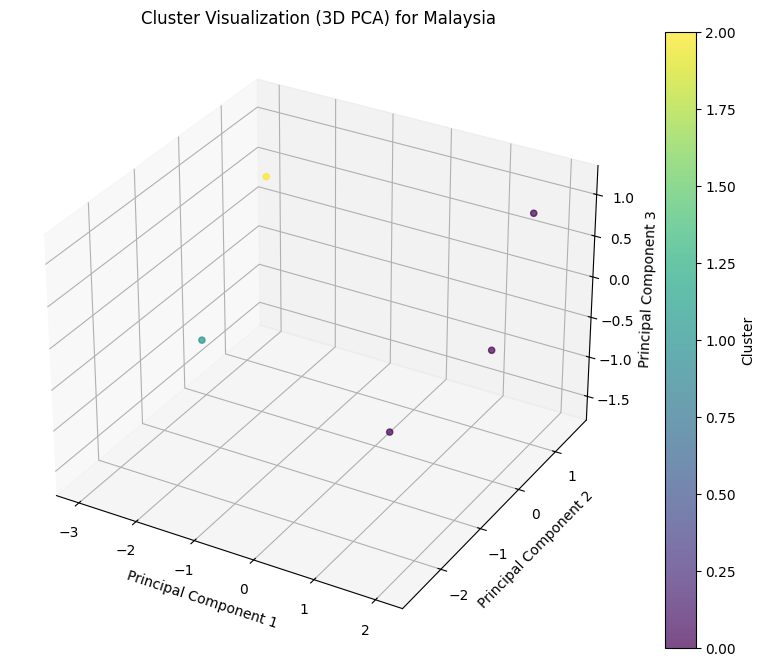

Visualizing clusters for: Mexico


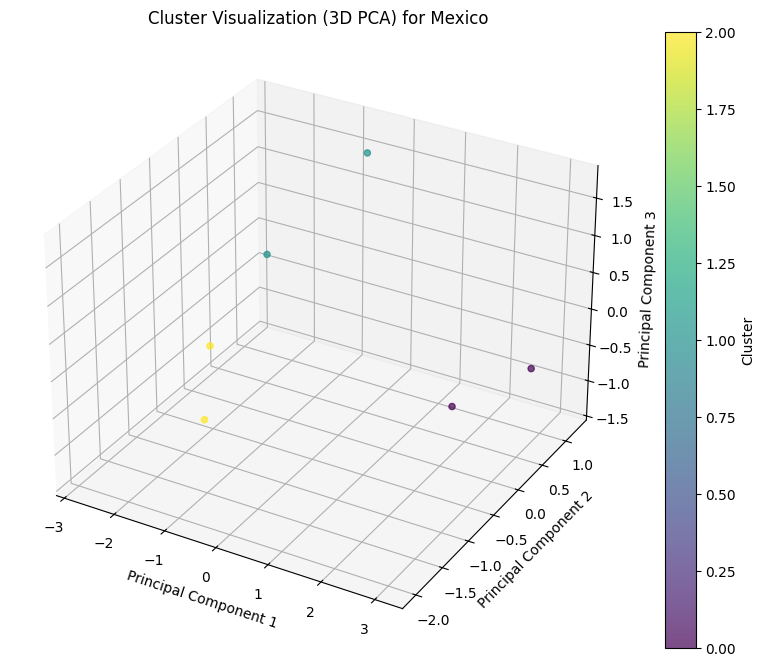

Visualizing clusters for: Moldova


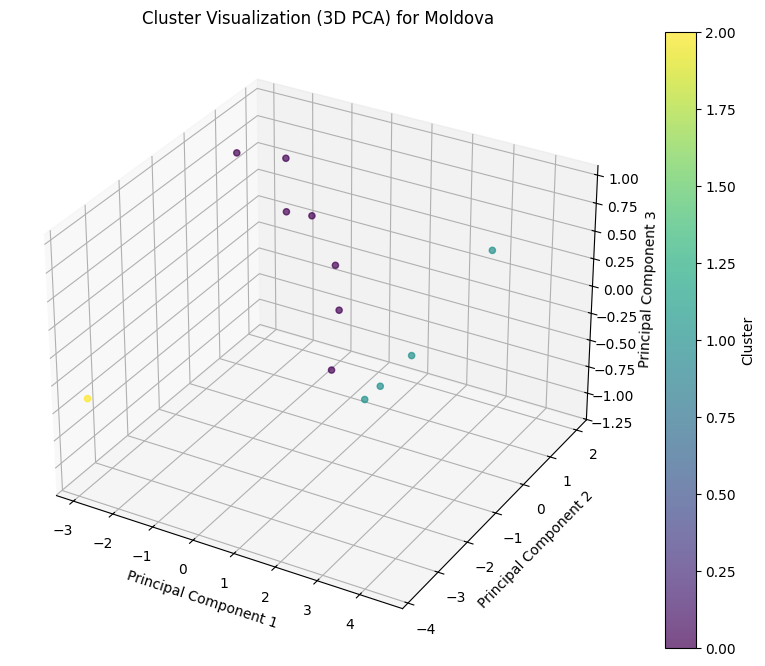

Visualizing clusters for: Mongolia


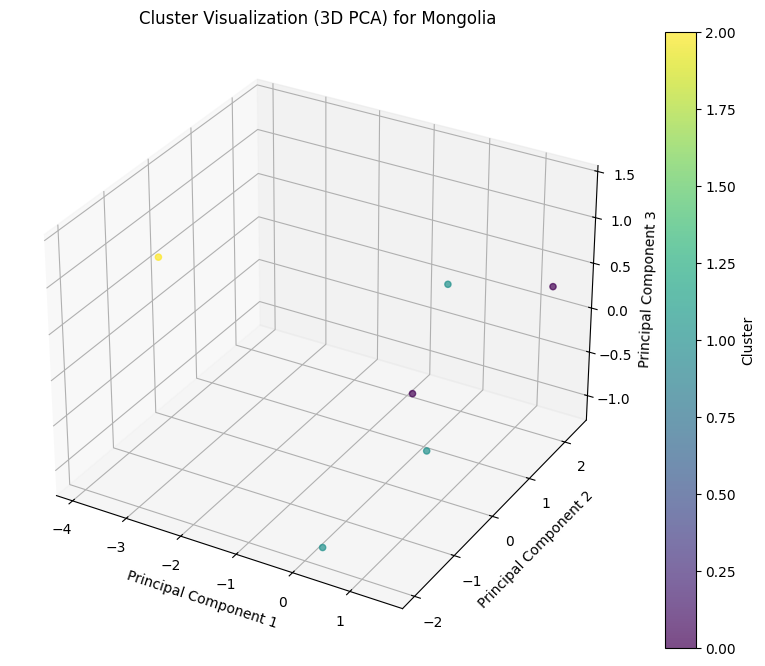

Visualizing clusters for: Montenegro


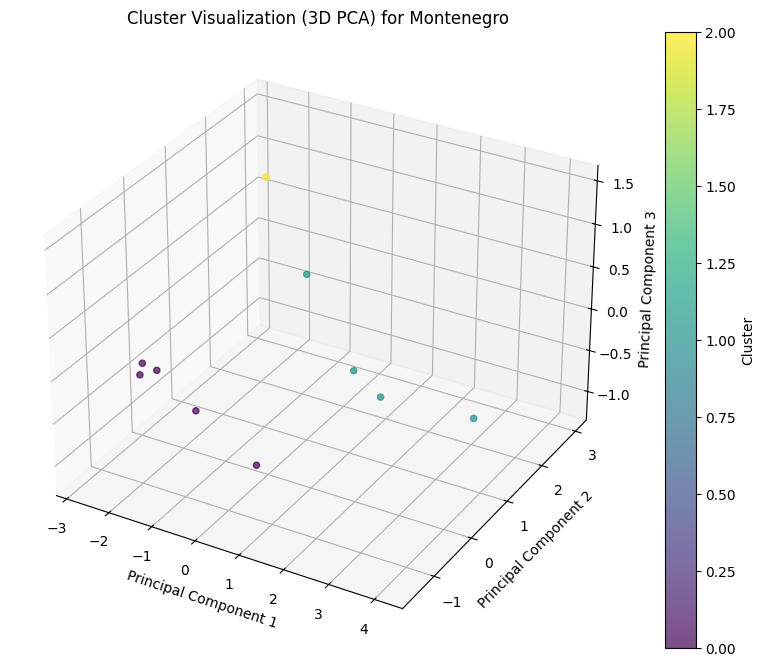

Visualizing clusters for: Netherlands


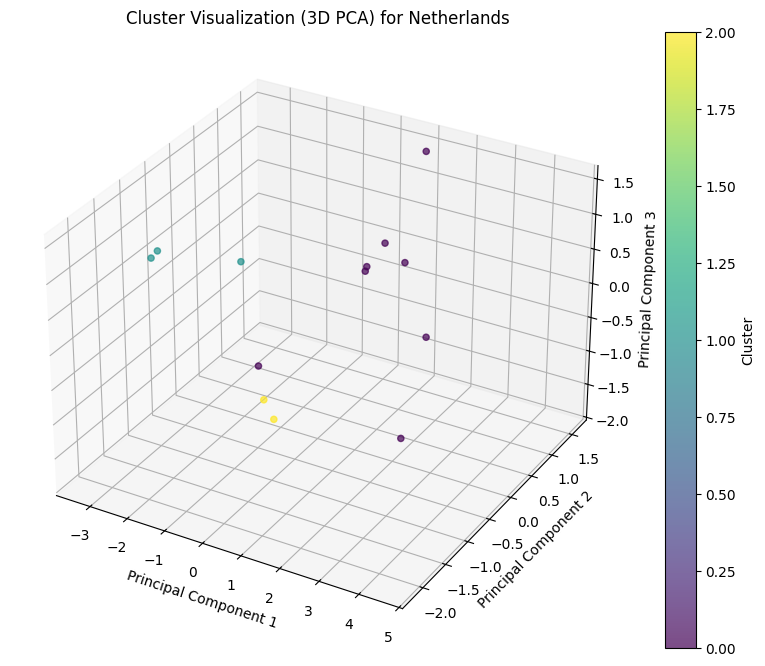

Visualizing clusters for: North Macedonia


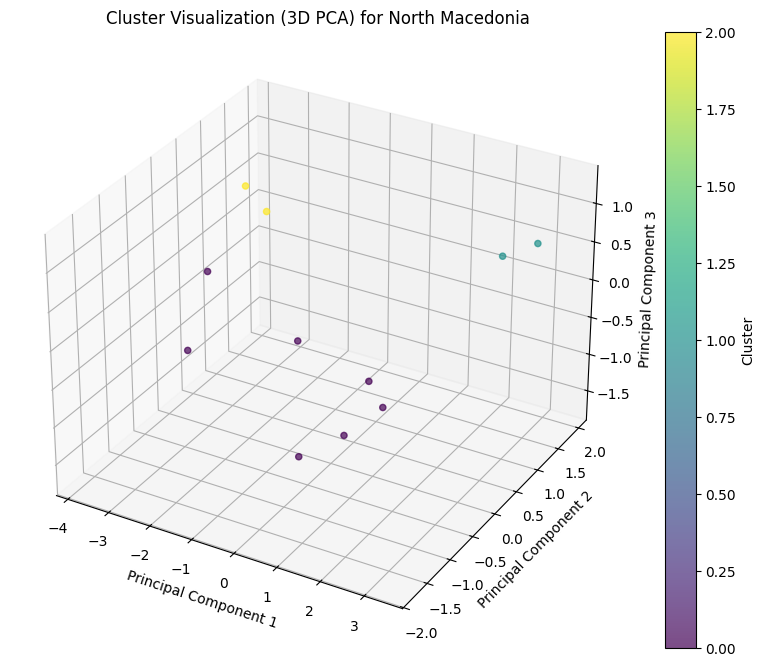

Visualizing clusters for: Norway


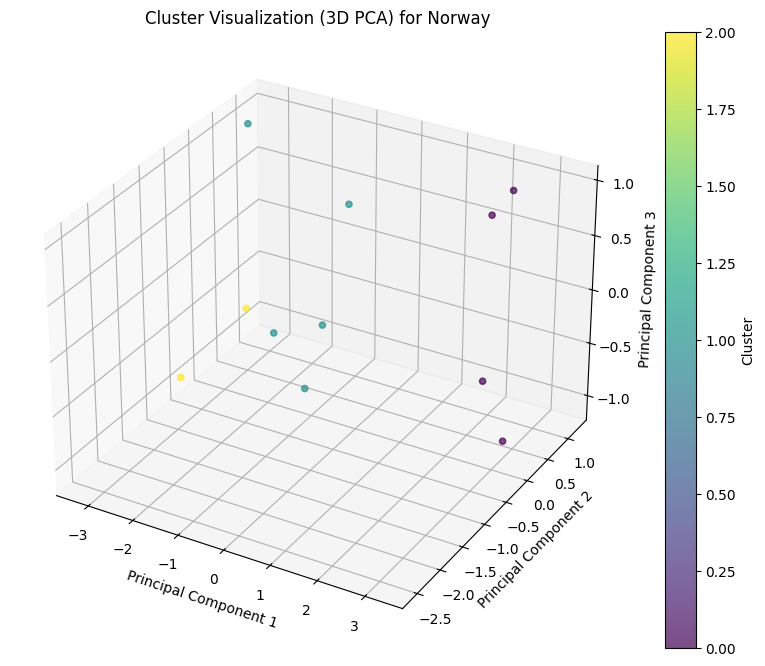

Visualizing clusters for: Pakistan


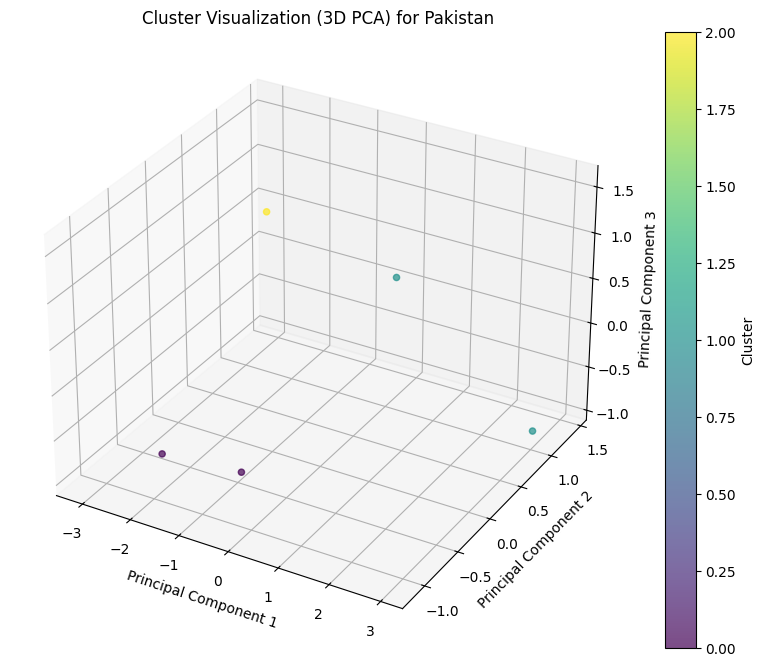

Visualizing clusters for: Panama


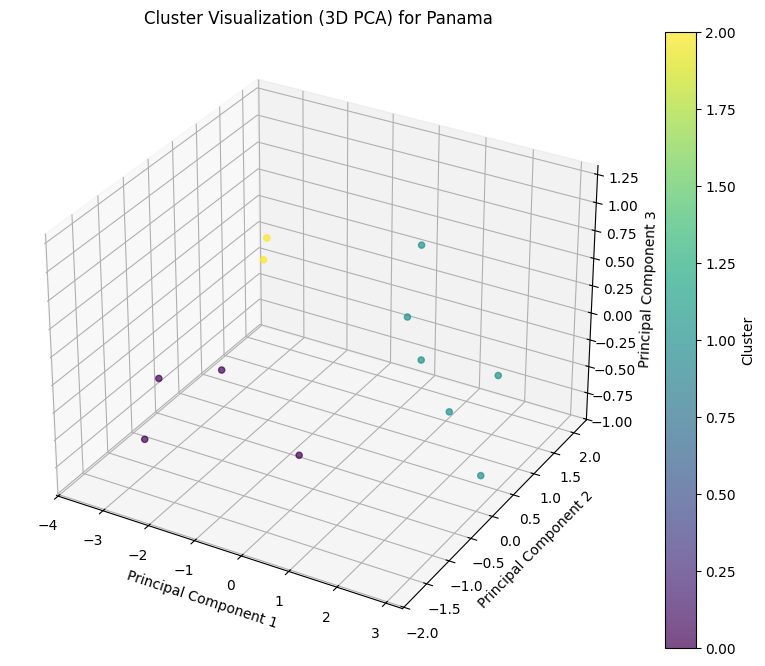

Visualizing clusters for: Paraguay


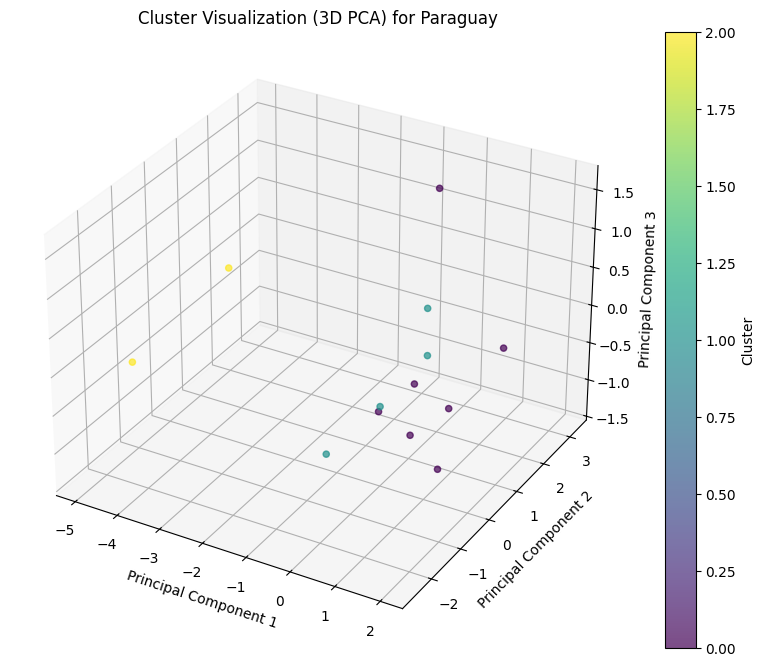

Visualizing clusters for: Peru


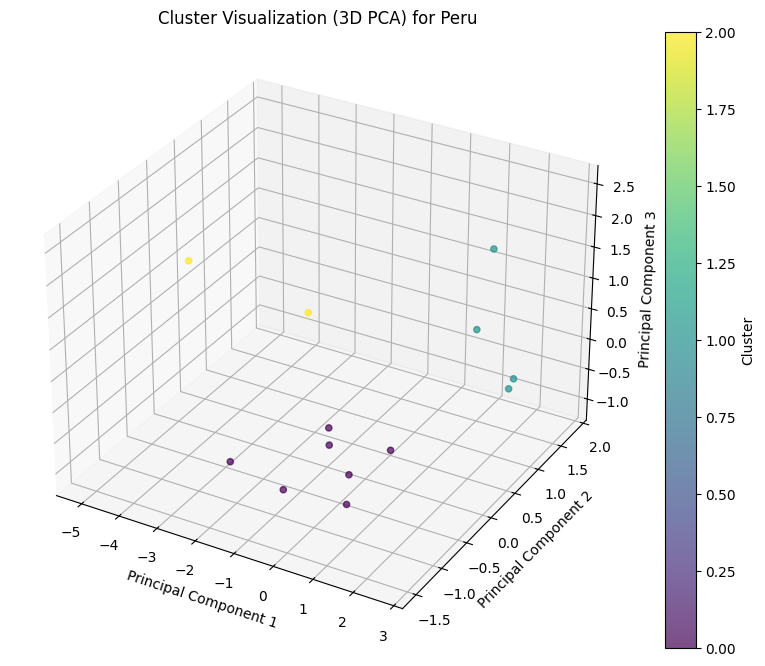

Visualizing clusters for: Philippines


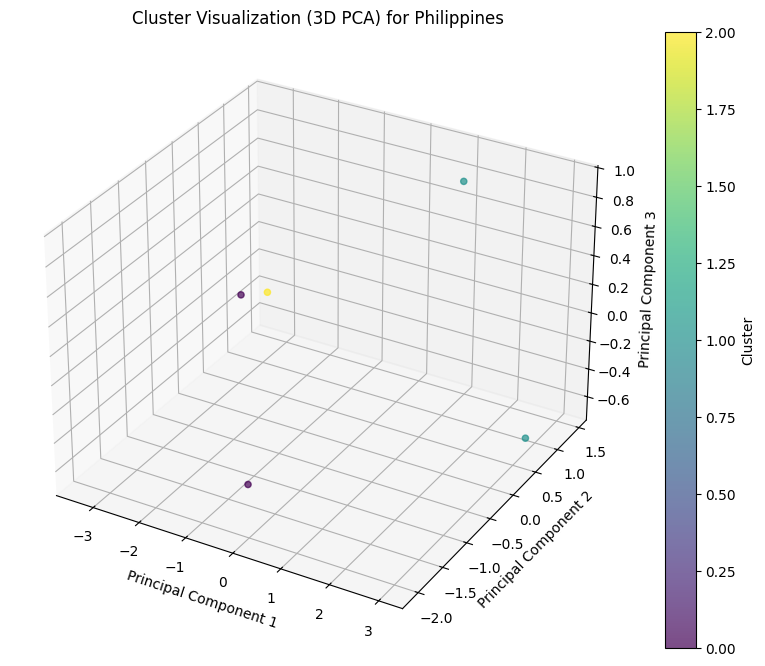

Visualizing clusters for: Poland


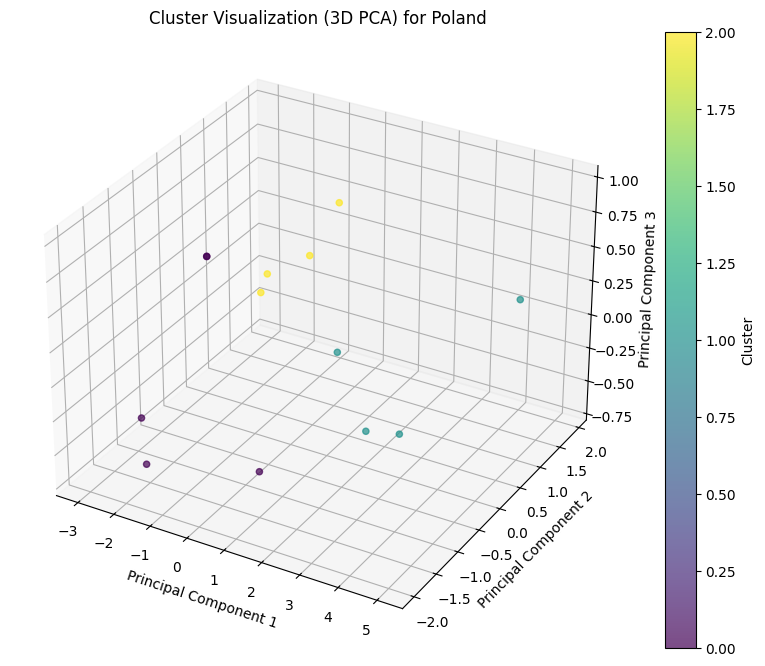

Visualizing clusters for: Portugal


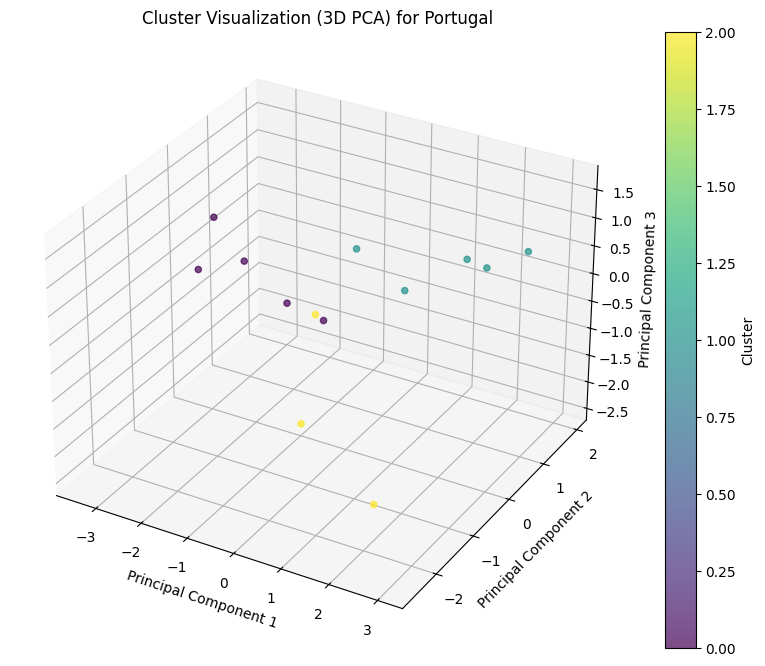

Visualizing clusters for: Romania


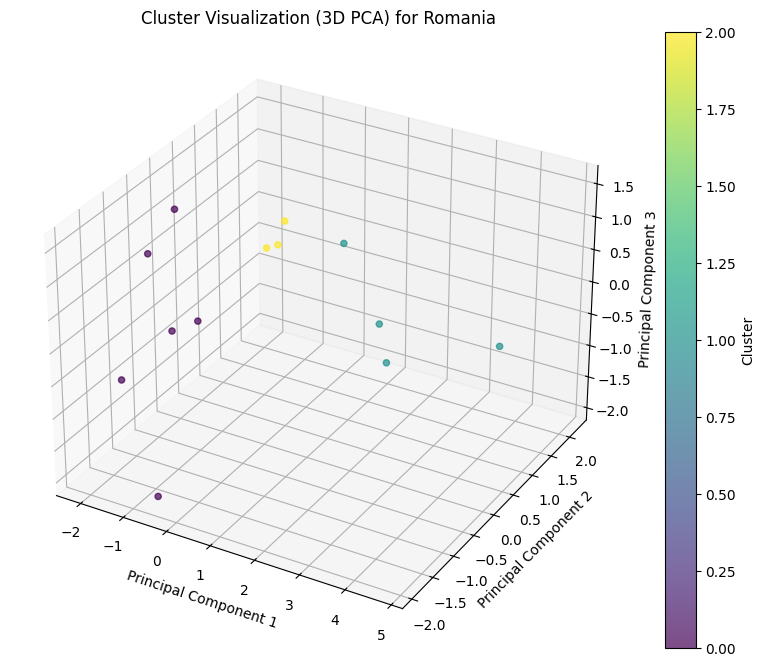

Visualizing clusters for: Russian Federation


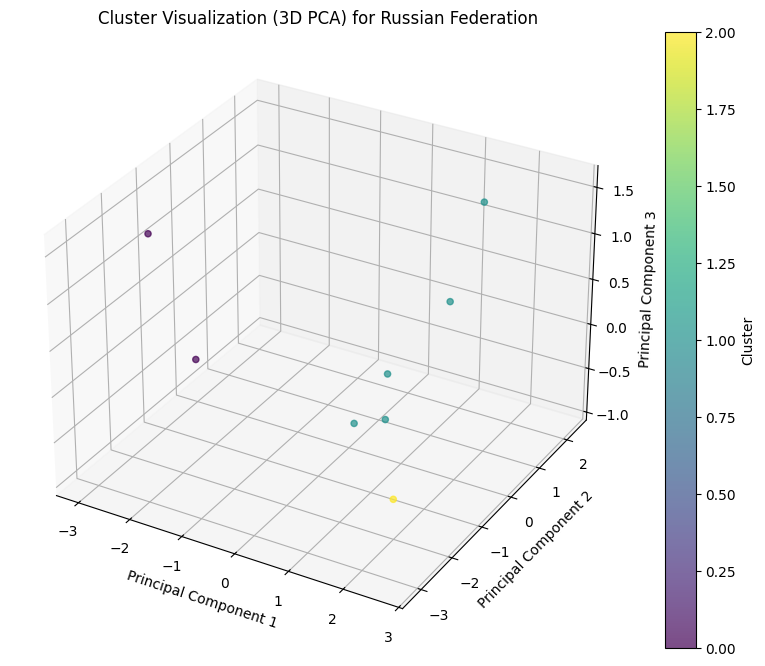

Visualizing clusters for: Serbia


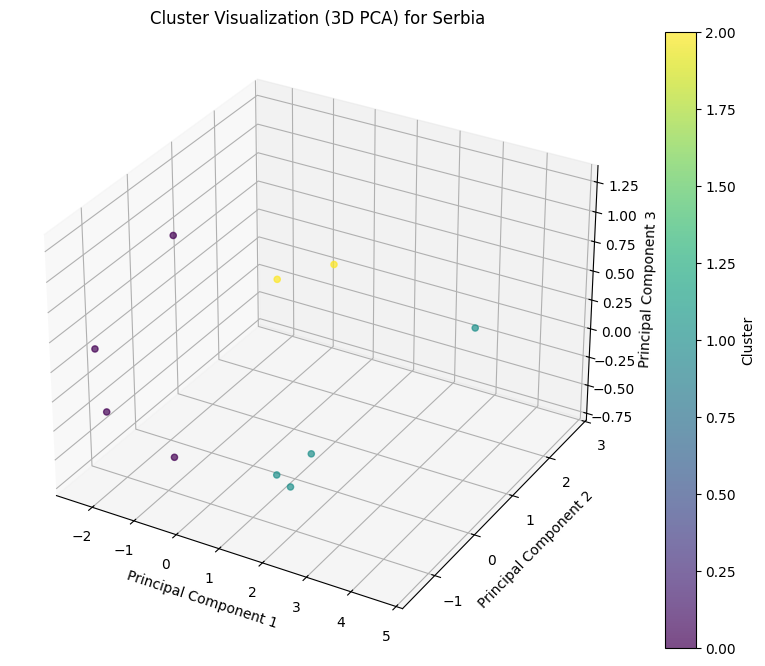

Visualizing clusters for: Slovak Republic


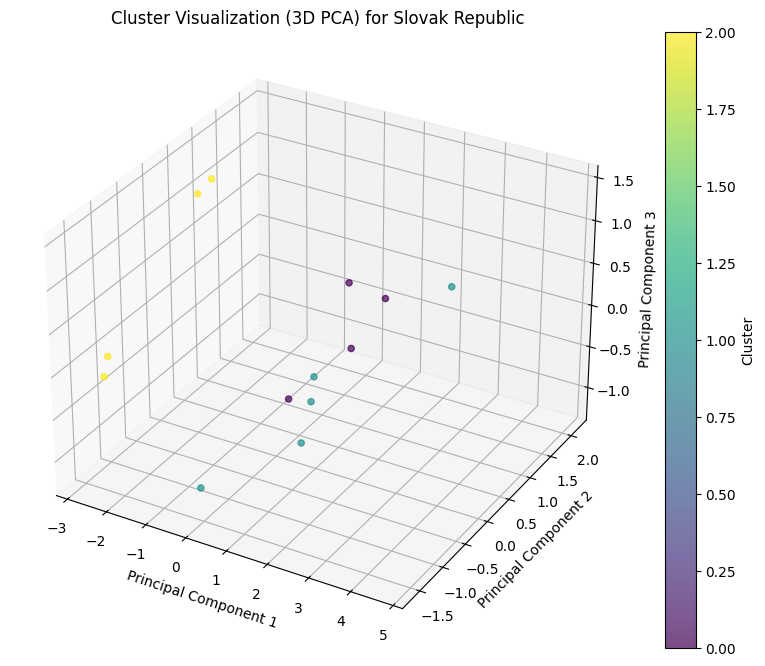

Visualizing clusters for: Slovenia


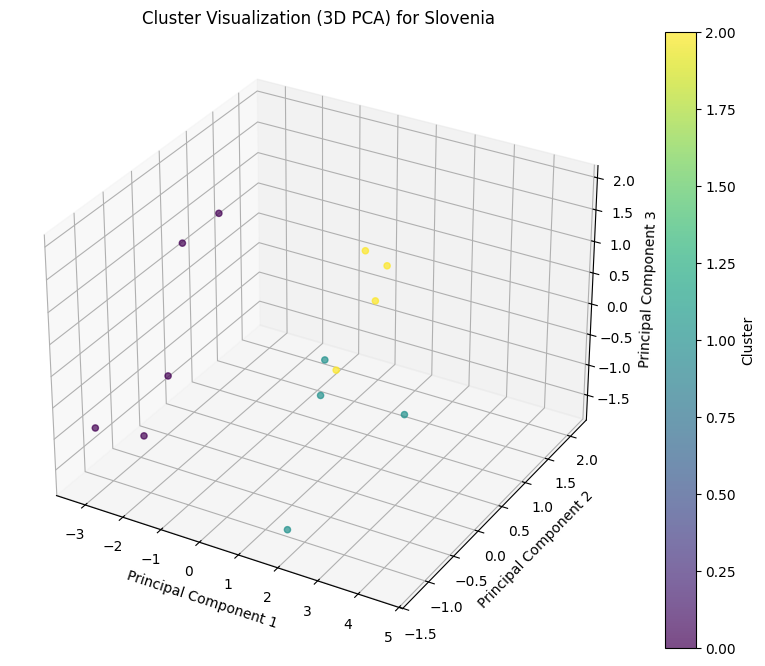

Visualizing clusters for: Spain


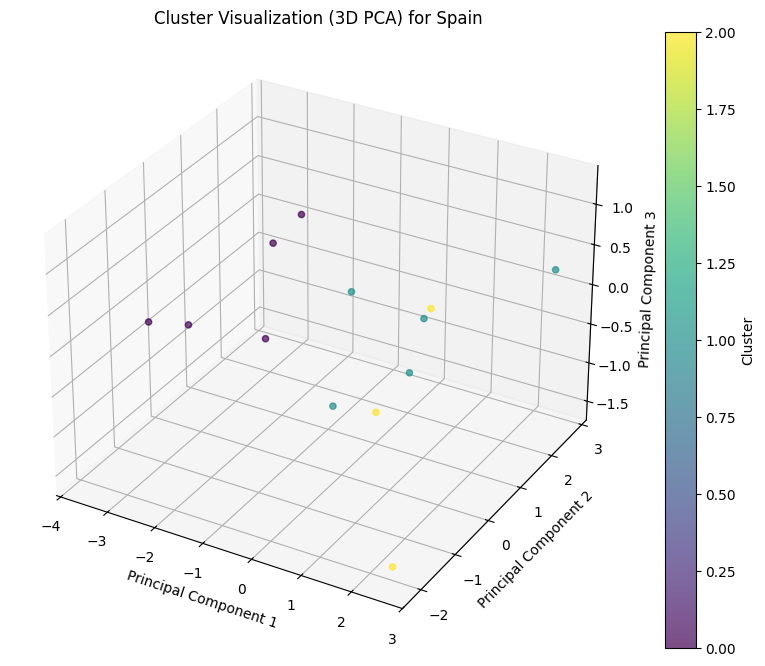

Visualizing clusters for: Sweden


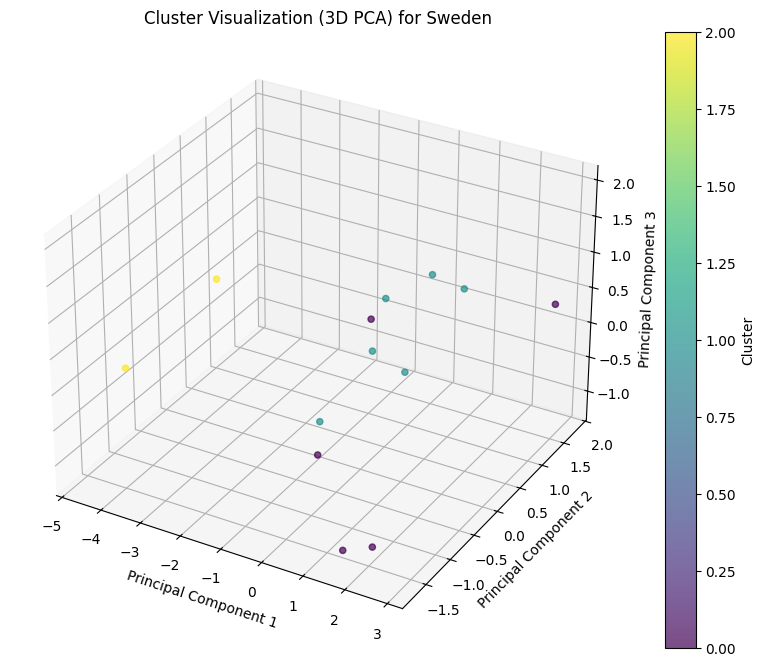

Visualizing clusters for: Switzerland


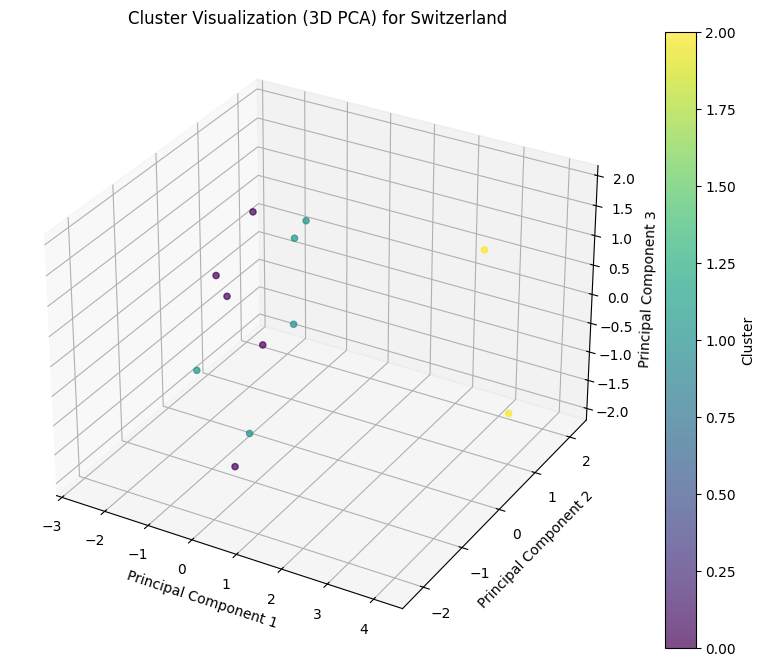

Visualizing clusters for: Thailand


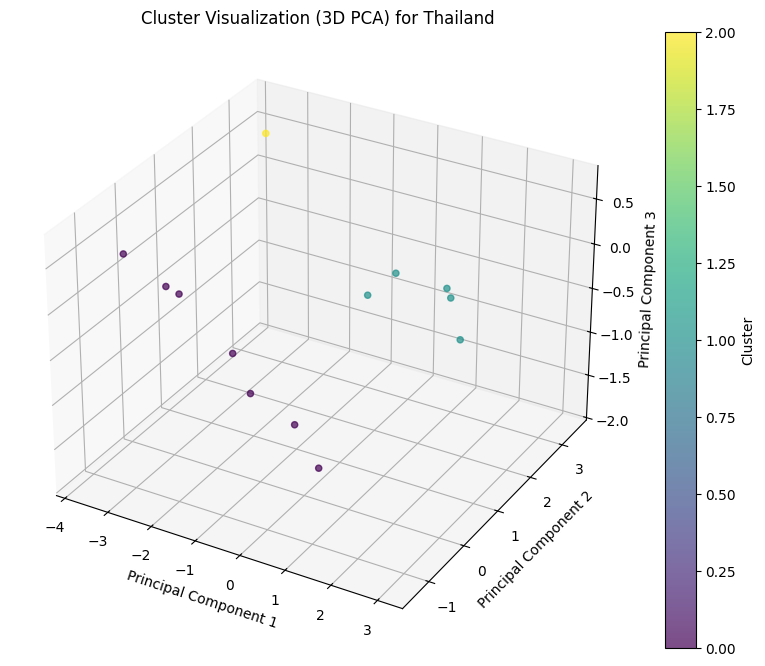

Visualizing clusters for: Ukraine


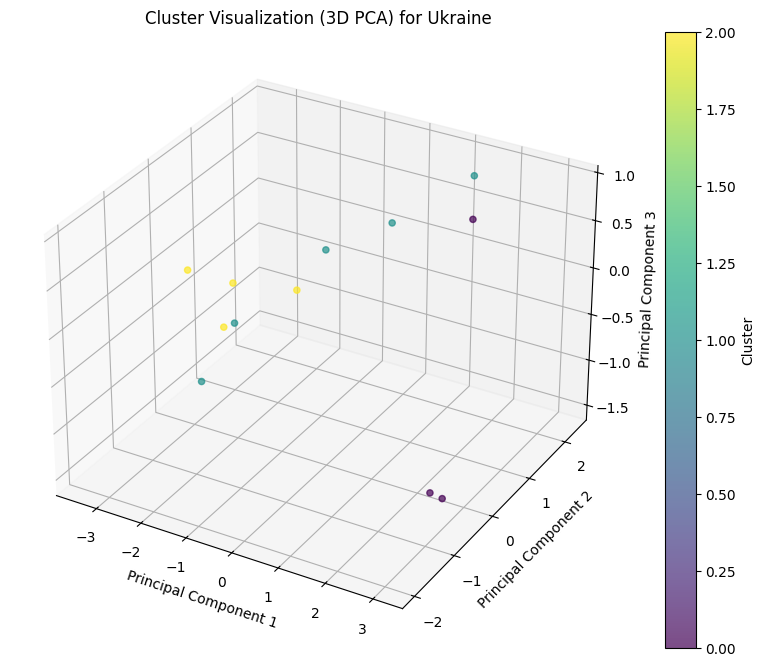

Visualizing clusters for: United Kingdom


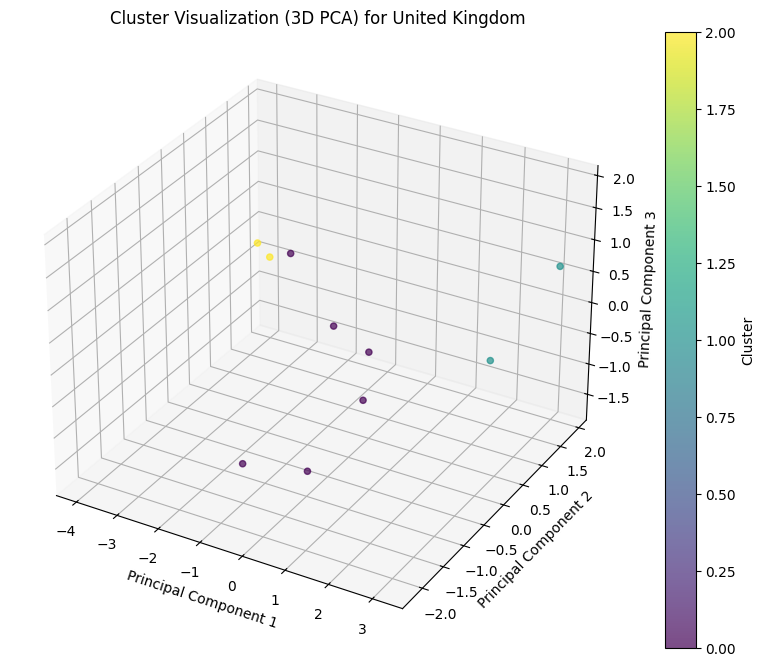

Visualizing clusters for: United States


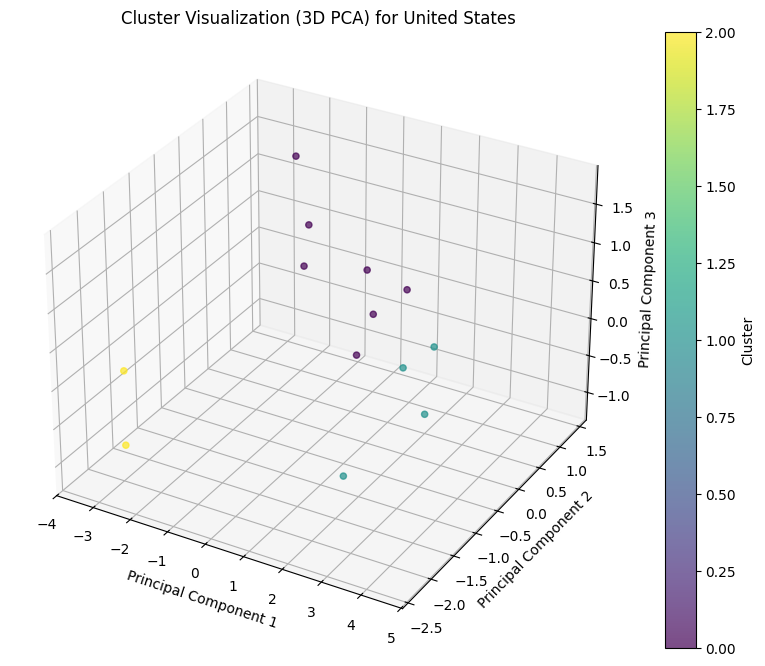

Visualizing clusters for: Uruguay


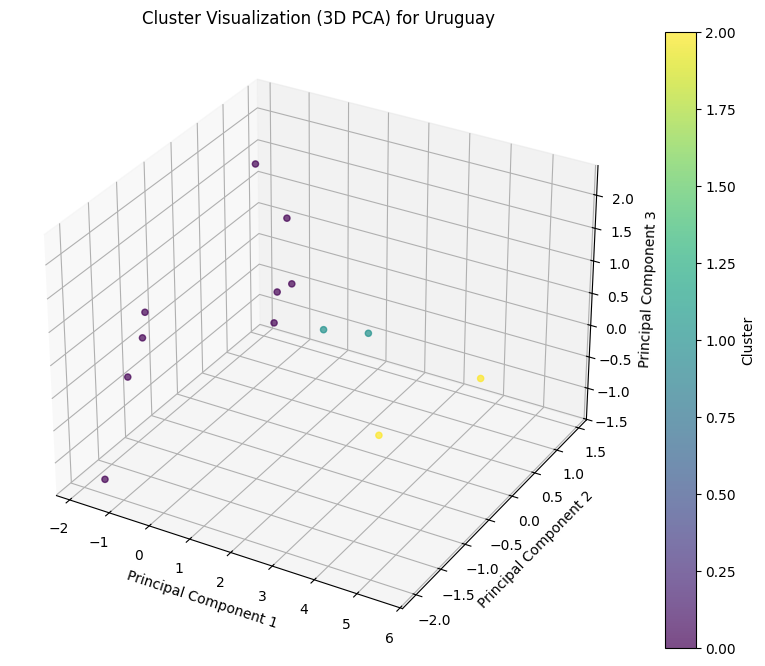

Visualizing clusters for: Viet Nam


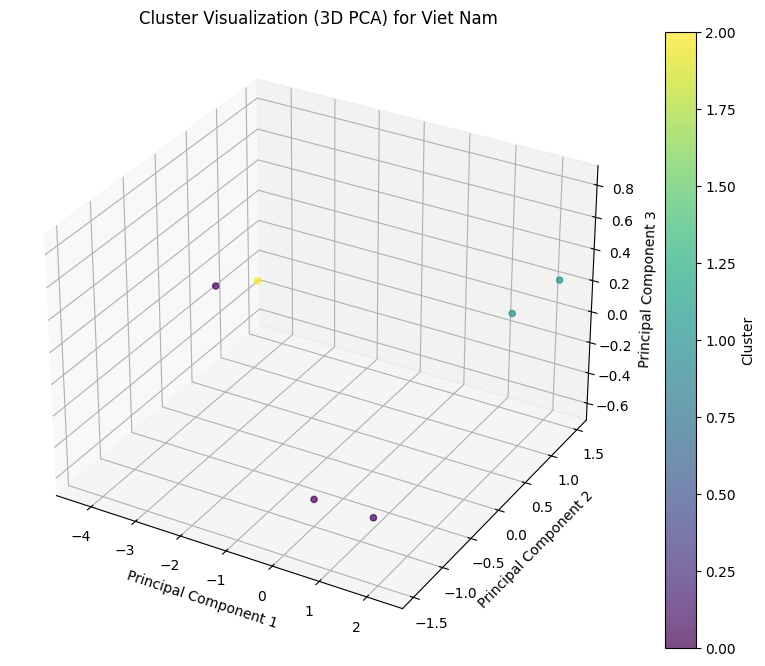

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D projection

def visualize_clusters_3d_per_country(file_path):
    # Load the clustered dataset
    data = pd.read_csv(file_path)

    # Ensure 'Country Name' column exists
    if 'Country Name' not in data.columns:
        raise ValueError("The dataset must contain a 'Country Name' column.")

    # Iterate through each country
    for country, group in data.groupby("Country Name"):
        print(f"Visualizing clusters for: {country}")

        # Select numeric columns except "Time"
        numeric_columns = group.select_dtypes(include=[np.number]).columns.tolist()
        numeric_columns = [col for col in numeric_columns if col not in ["Time"]]

        # Drop rows with missing values in numeric columns
        data_for_clustering = group[numeric_columns].dropna()

        # Skip if there's not enough data for clustering
        if len(data_for_clustering) < 3:
            print(f"Skipping {country}: Not enough data for clustering.")
            continue

        # Standardize the data
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(data_for_clustering)

        # Apply PCA for 3D visualization
        pca = PCA(n_components=3)
        reduced_data = pca.fit_transform(scaled_data)

        # Apply KMeans clustering
        kmeans = KMeans(n_clusters=3, random_state=42)
        clusters = kmeans.fit_predict(scaled_data)

        # Enable interactive mode
        plt.ion()

        # Plot the PCA results with cluster labels in 3D
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(
            reduced_data[:, 0], 
            reduced_data[:, 1], 
            reduced_data[:, 2], 
            c=clusters, 
            cmap='viridis', 
            alpha=0.7
        )
        ax.set_title(f"Cluster Visualization (3D PCA) for {country}")
        ax.set_xlabel("Principal Component 1")
        ax.set_ylabel("Principal Component 2")
        ax.set_zlabel("Principal Component 3")
        fig.colorbar(scatter, label="Cluster")

        plt.show()

# File path to the clustered dataset
clustered_data_path = "Clustered_CoL_data.csv"
visualize_clusters_3d_per_country(clustered_data_path)
